# Final Project Marketing Campaign 

- Dian Munawaroh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib import rcParams
warnings.filterwarnings('ignore')

In [2]:
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv("marketing_campaign.csv",sep=";")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04/09/2012       58       635  ...                  7             0   
1  08/03/2014       38        11  ...                  5             0   
2  21/08/2013       26       426  ...                  4             0   
3  10/02/2014       26        11  ...                  6             0   
4  19/01/2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

membuat column baru untuk umur

## 1. Descriptive stat (+import data):

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observations:**
- DataSets Memiliki 29 kolom dan 2240 baris data
- DataSets Terdapat 3 jenis tipe data yaitu : int64,object,float64
- DataSets kolom income memiliki 2216 nilai non-null, dan 24 nilai null 

### Duplikat dan Null

In [5]:
df[df.duplicated(keep=False) == True]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

Tidak menemukan duplikat

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
(df.isna().sum()/df.shape[0]*100)['Income']

1.0714285714285714

terdapat 1.07% data yang hilang atau null

### Memisahkan Data

In [8]:
nums=['Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Kidhome',
       'Teenhome']
cats =['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']
timestamp = ["Dt_Customer"]

### Numerik

In [9]:
df[nums].describe().T

count          mean           std     min       25%  \
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   

                         50%       75%       max  
Income               51381.5  68522.00  666666.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0

Household Income:
- Rata Rata (mean) adalah 52247.25 dan Median nya adalah 51381.5 dari data tersebut dapat disimpulkan bahwa rata-rata lebih besar dari pada median maka menggambarkan sedikit right-skewed distribution
- Selanjutnya mempunyai range 1730.0 (minimal) ke 666666.0 (maximal) yang sangat jauh, menandakan adanya outliers sehingga perlu dilakukan data preprocessing atau segmentasi pada data income  sebelum melanjutkan ke tahap pemodelan

Recency:
- Rata Rata (mean) dan median memiliki kesamaan yang artinya adalah normal-skewed distribution
- Memiliki rentang sangat tinggi yaitu 0 ke 99.0 yang berarti berapa hari sejak pembelian terkakhir

MntWines:
- Rata rata (mean) dan median 2 tahun terakhir adalah 303.93

MntFruits:
- Rata rata (mean) dan median 2 tahun terakhir adalah 26.30

MntMeatProducts:
- Rata rata (mean) dan median 2 tahun terakhir adalah 166.9

MntFishProducts:
- Rata rata (mean) dan median 2 tahun terakhir adalah 	37.52

MntSweetProducts:
- Rata rata (mean) dan median 2 tahun terakhir adalah 	27.06

MntGoldProds:
- Rata rata (mean) dan median 2 tahun terakhir adalah 44.02

NumDealsPurchases:
- Rata rata (mean) pelanggan melakukan 2,32 jumlah Jumlah pembelian yang dilakukan dengan diskon (NumDealsPurchases) dan jumlah maksimal pembelian yang dilakukan langsung di toko adalah 15.

NumWebPurchases:
- Rata rata (mean) customer melakukan 4,08 pembelian melalui situs web perusahaan, dan medianya adalah 4. sedikit right-skewed distribution.


NumCatalogPurchases:
- Rata rata (mean) customer melakukan pembelian nomor 2,66 yang dilakukan dengan menggunakan katalog

NumStorePurchases:
- Rata rata (mean)  customer melakukan 5,79 jumlah pembelian yang dilakukan langsung di toko, dan medianya adalah 5.

Year_Birth:
- Tahun kelahiran tertua yaitu 1893 yang kemungkinan ada karena salah input data sehingga data harus diproses lebih lanjut

### Categorical

In [10]:
for column in cats:
    print(df[column].value_counts())
    print("-" * 40)
    print(df[column].value_counts(normalize=True))

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
----------------------------------------
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
----------------------------------------
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64
0    2077
1     163
Name: AcceptedCmp3, dtype: int64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64
0    2073
1     167
Name: AcceptedCmp4, dtype: int64
----------------------------------------
0    0.925446
1    0.074554

1.   Dalam kategori Education, "2n Cycle" dan "Master" memliki arti yang sama.
2.   Dalam kategori Marital Status, "Single" dan "Alone" memiliki arti yang sama.
3.   Dalam kategori Marital Status, ada beberapa data yang tidak jelas apa yang dimaksud yaitu  "Absurd" dan "YOLO", maka disarankan digabung dan diganti "other".





## 2. Univariate analysis:

- Chantika Azzamy S. Yahya
- Siti Muthmainah D

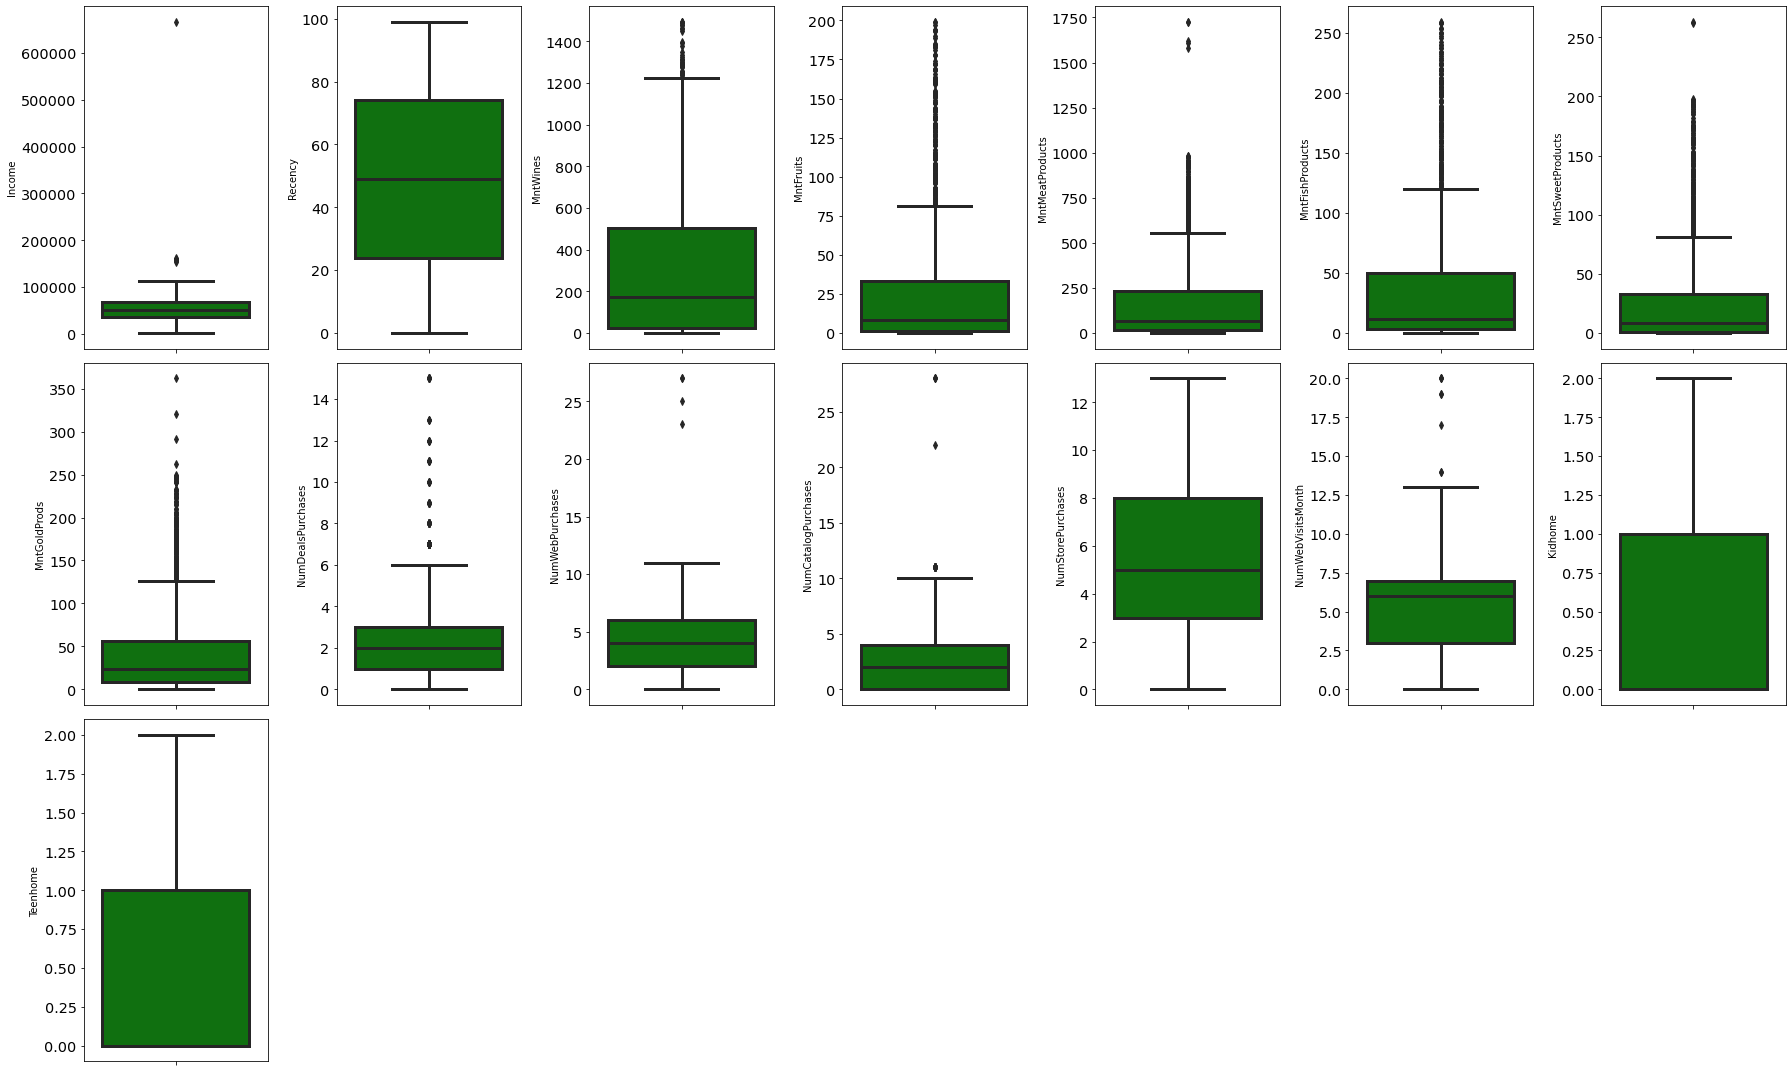

In [11]:
# Individual Boxplot
plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Terdapat outlier pada kolom Year_Birth, Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, dan NumWebVisitMonth.
* Pada kolom **Income**, outlier terjauh adalah di atas $600,000. 
* Pada kolom **MntWines**, outlier berada pada angka 1200 keatas.
* Pada kolom **MntFruits**, outlier berada di sekitar angka 80 sampai 200.
* Pada kolom **MntMeatProducts**, outlier terjauh ada di sekitar angka 1,750.
* Pada kolom **MntFishProducts**, outlier berada di sekitar angka 125 sampai diatas 250.
* Pada kolom **MntSweetProducts**, outlier terjauh berada di sekitar angka 250.
* Pada kolom **MntGoldProds**, outlier terjauh berada di sekitar angka 350.
* Pada kolom **NumDealsPurchases**, outlier terjauh berada di angka 15.
* Pada kolom **NumWebPurchases**, outlier berada di sekitar angka 25.
* Pada kolom **NumCatalogPurchases**, outlier terjauh berada di atas angka 25.
* Pada kolom **NumWebVisitsMonth**, outlier terjauh berada di angka 20.

**Hal yang harus dilakukan saat Data Pre-Processing adalah:**


*   Membersihkan data dengan cara menghapus outliers berdasarkan IQR atau Z-score.







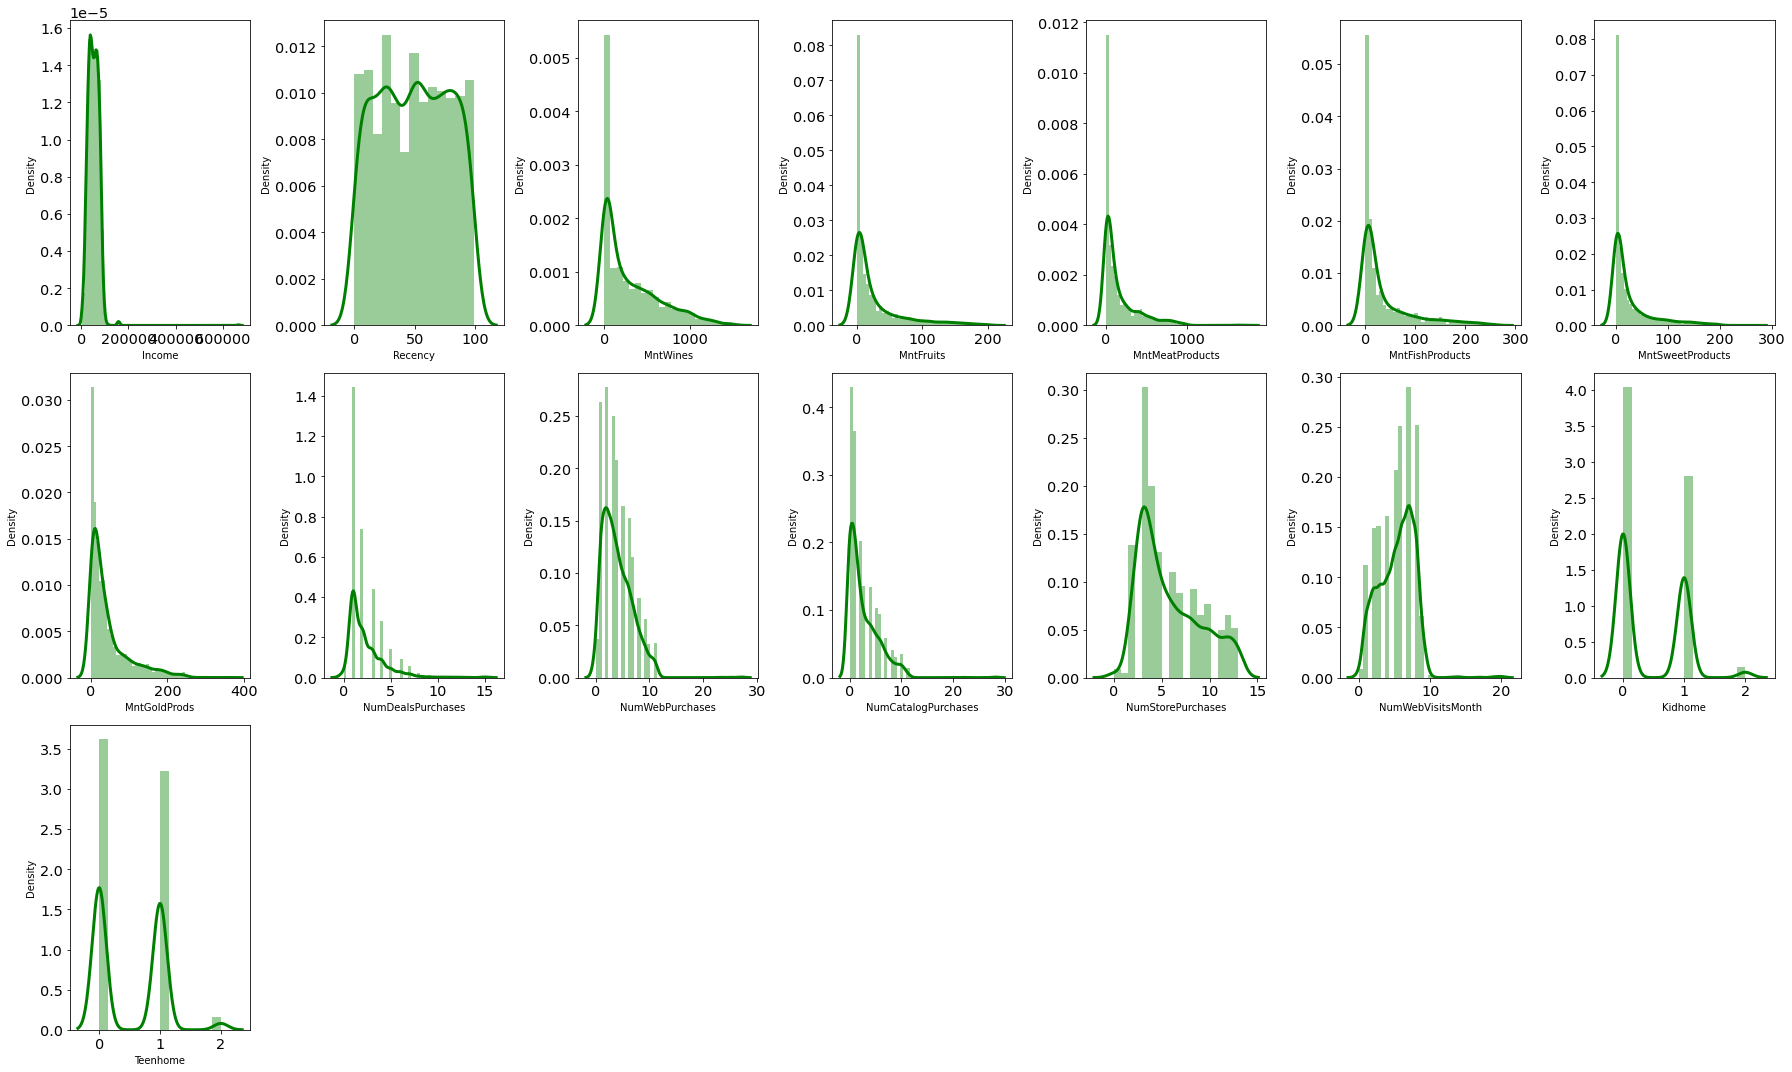

In [12]:
# Individual Distplot
plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 7, i+1) 
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

- Kolom yang memiliki distribution normal yaitu kolom Recency.
- Kolom yang memiliki distribution right skewed, diantaranya yaitu kolom Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, dan NumWebVisitsMonth.
- Sedangkan kolom Kidhome dan Teenhome memiliki bimodal distribution.

**Hal yang harus dilakukan saat Data Pre-Processing adalah:**
*   Melakukan log transformation pada kolom yang memiliki distribusi data right-skewed.



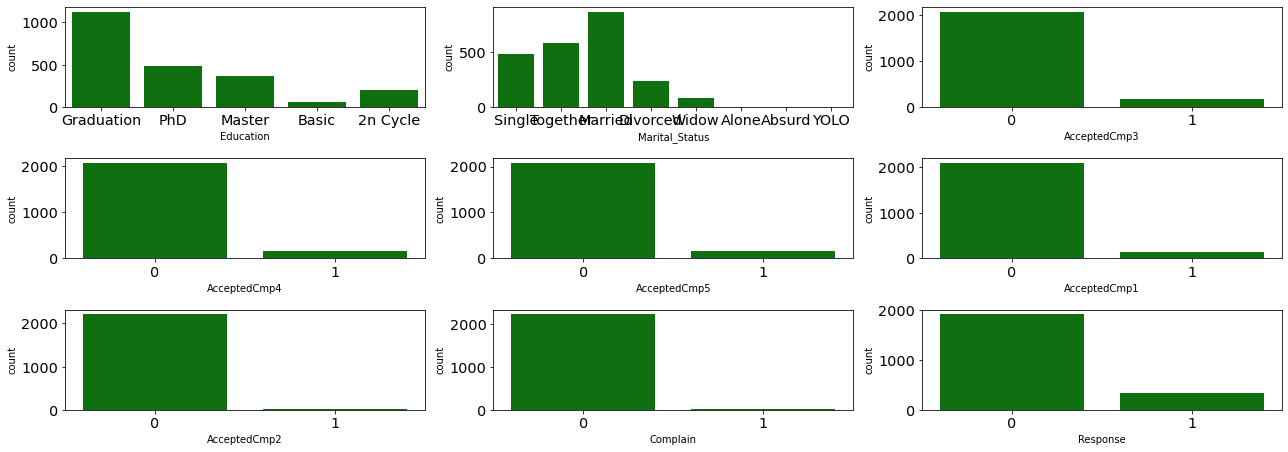

In [13]:
# Individual Countplot
plt.figure(figsize=(18, 8))
for i in range(0, len(cats)):
    plt.subplot(4, 3, i+1)
    sns.countplot(df[cats[i]], color='green', orient='h')
    plt.tight_layout()

- Terlalu banyak kategori pada kolom Year_Birth
- Kolom Education dan Marital_Status memiliki beberapa kategori yang valuenya sama dan ambigu.
- Kolom AcceptedCmp1, AcceptedCmp2, AcceptedCmp3 ,AcceptedCmp4, AcceptedCmp5, Complain, dan Response value didominasi dengan value 0.

**Hal yang harus dilakukan saat Data Pre-Processing adalah:**
* Dari kolom Year_Birth dibuat kolom baru yaitu kolom Age yang menunjukkan umur seorang customer.
* Menyatukan kategori yang sama, seperti pada kolom Marital_Status, Single dan Alone.
* Memutuskan untuk menghapus kategori ambigu, seperti pada kolom Marital_Status, 'Absurd' dan 'YOLO' atau mengganti kategori tersebut menjadi kategori 'Others'
* Melakukan Label Encoding pada kolom Education.
* Melakukan One Hot Encoding (OHE) pada kolom Marital_Status. 

## 3. Multivariate analysis

- Andika Bumi Anugrah
- Muhammad Hadyan

### HEATMAP

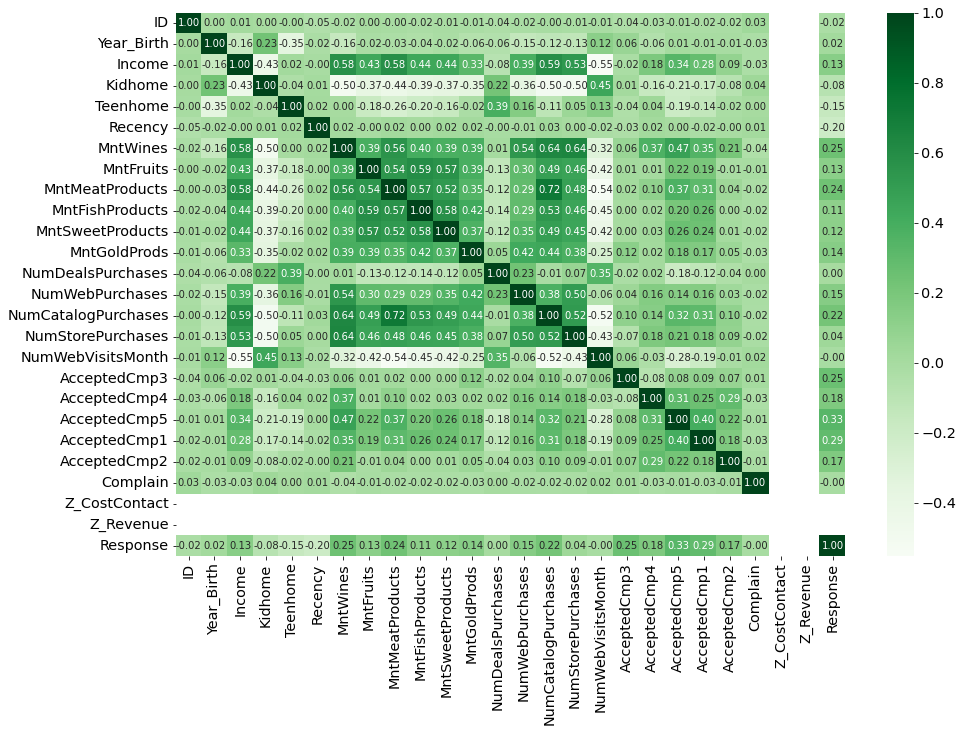

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')



*   **Year_Birth** berkolerasi positif dengan **Kidhome**, bisa dikatakan semakin muda maka semakin banyak pula anak kecilnya sedangkan untuk kolom **Teenhome** berkolerasi negatif atau semakin tua customer maka jumlah anak remaja semakin banyak
*   Customer yang memiliki anak kecil **Income** nya cenderung rendah
*   Customer yang memiliki anak kecil cenderung lebih sering mengunjungi web dan melakukan pembelian ketika sedang diskon
*   Customer yang memiliki anak remaja cenderung lebih banyak melakukan pembelian ketika sedang diskon
*   Customer yang memiliki **Income** yang tinggi cenderung banyak melakukan pembelian
*   Kolom **Income** berkorelasi positif cukup besar dengan **MnWines, MntFruits, MntMeatProduct, MntFishProduct, MntSweetProduct dan MntGoldProduct**  
*   Kolom **Income** berkorelasi positif cukup besar dengan **NumWebPurchases, NumCatalogPurchases, dan NumStorePurchases** sedangkan dengan kolom **NumWebVisitsPurchases** berkorelasi negative cukup besar, bisa dikatakan bahwa semakin besar income customer maka mayoritas tempat yang dipilih untuk melakukan pembelian adalah Web, Catalog dan Store, sedangankan customer yang memiliki income rendah cenderung lebih banyak melakukan pembelian melauli web atau lebih sering mengunjungi web
*   Kolom **MntWines** berkorelasi positif cukup besar dengan **MntMeatProduct**, kemungkinan customer membeli wine juga membeli meat
*   Kolom **MntFruits** berkorelasi positif cukup besar dengan **MntMeatProduct, MntFishProduct dan MntSweetProduct**, kemungkinan ketika customer membeli product tersebut bersamaan  
*   **MntMeatProduct** berkorelasi positif cukup besar dengan **NumCatalogPurchases**, bisa dikatakan sebagian besar pembelian meat product dilakukan melalui catalog 
***MntWines** paling banyak dibeli melalui katalog dari pada metode pembelian lainya
*   Kolom **NumDealsPurcases** berkorelasi positif dengan **NumWebVisitMonth**, ketika sedang diskon customer yang mengunjungi web meningkat 
*   Kolom **NumWebVisitMonth** berkorelasi negatif cukup besar dengan   **NumCatalogPurchases dan NumStorePurchases**, ketika customer lebih sering mengunjungi web maka pembelian melalui catalog dan store menurun
*   Korelasi Kolom **Response** dengan kolom lainnya cenderung rendah 
*   Complain, Z_CostContact dan Z_Revenue sebaiknya dihapus



### PAIRPLOT

<Figure size 1080x1080 with 0 Axes>

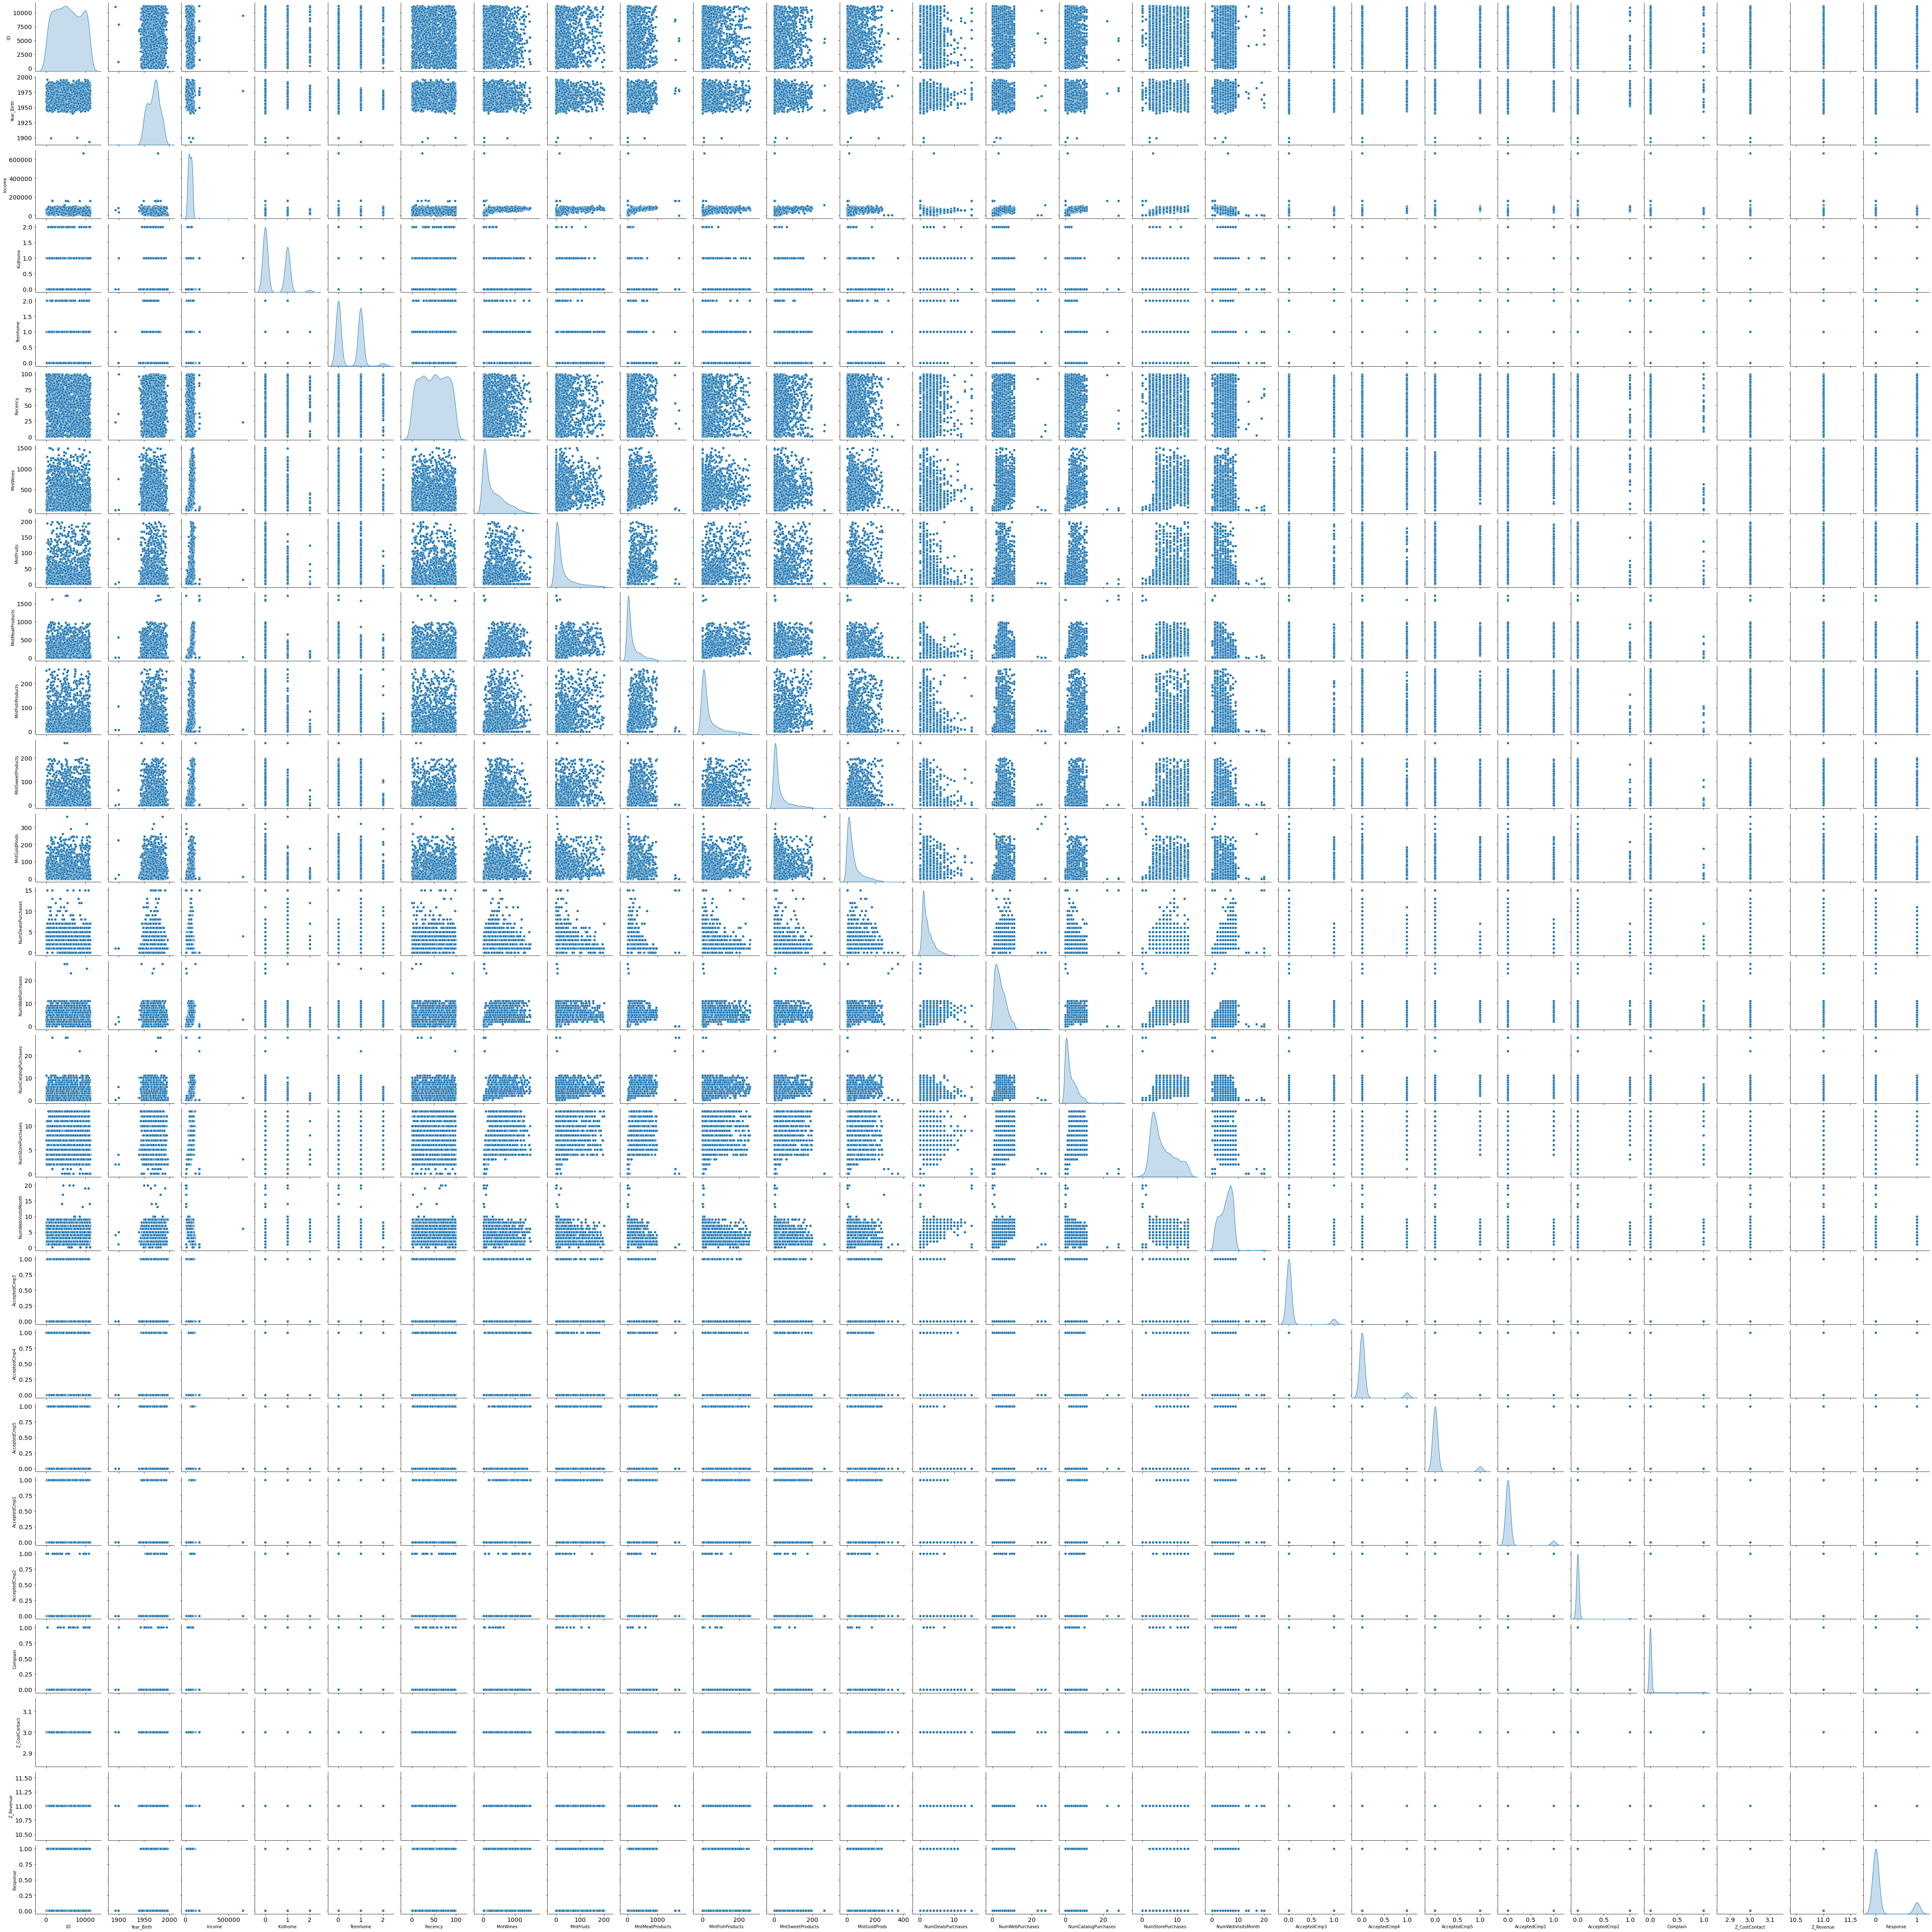

In [15]:
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde')

### Education and Year_Birth


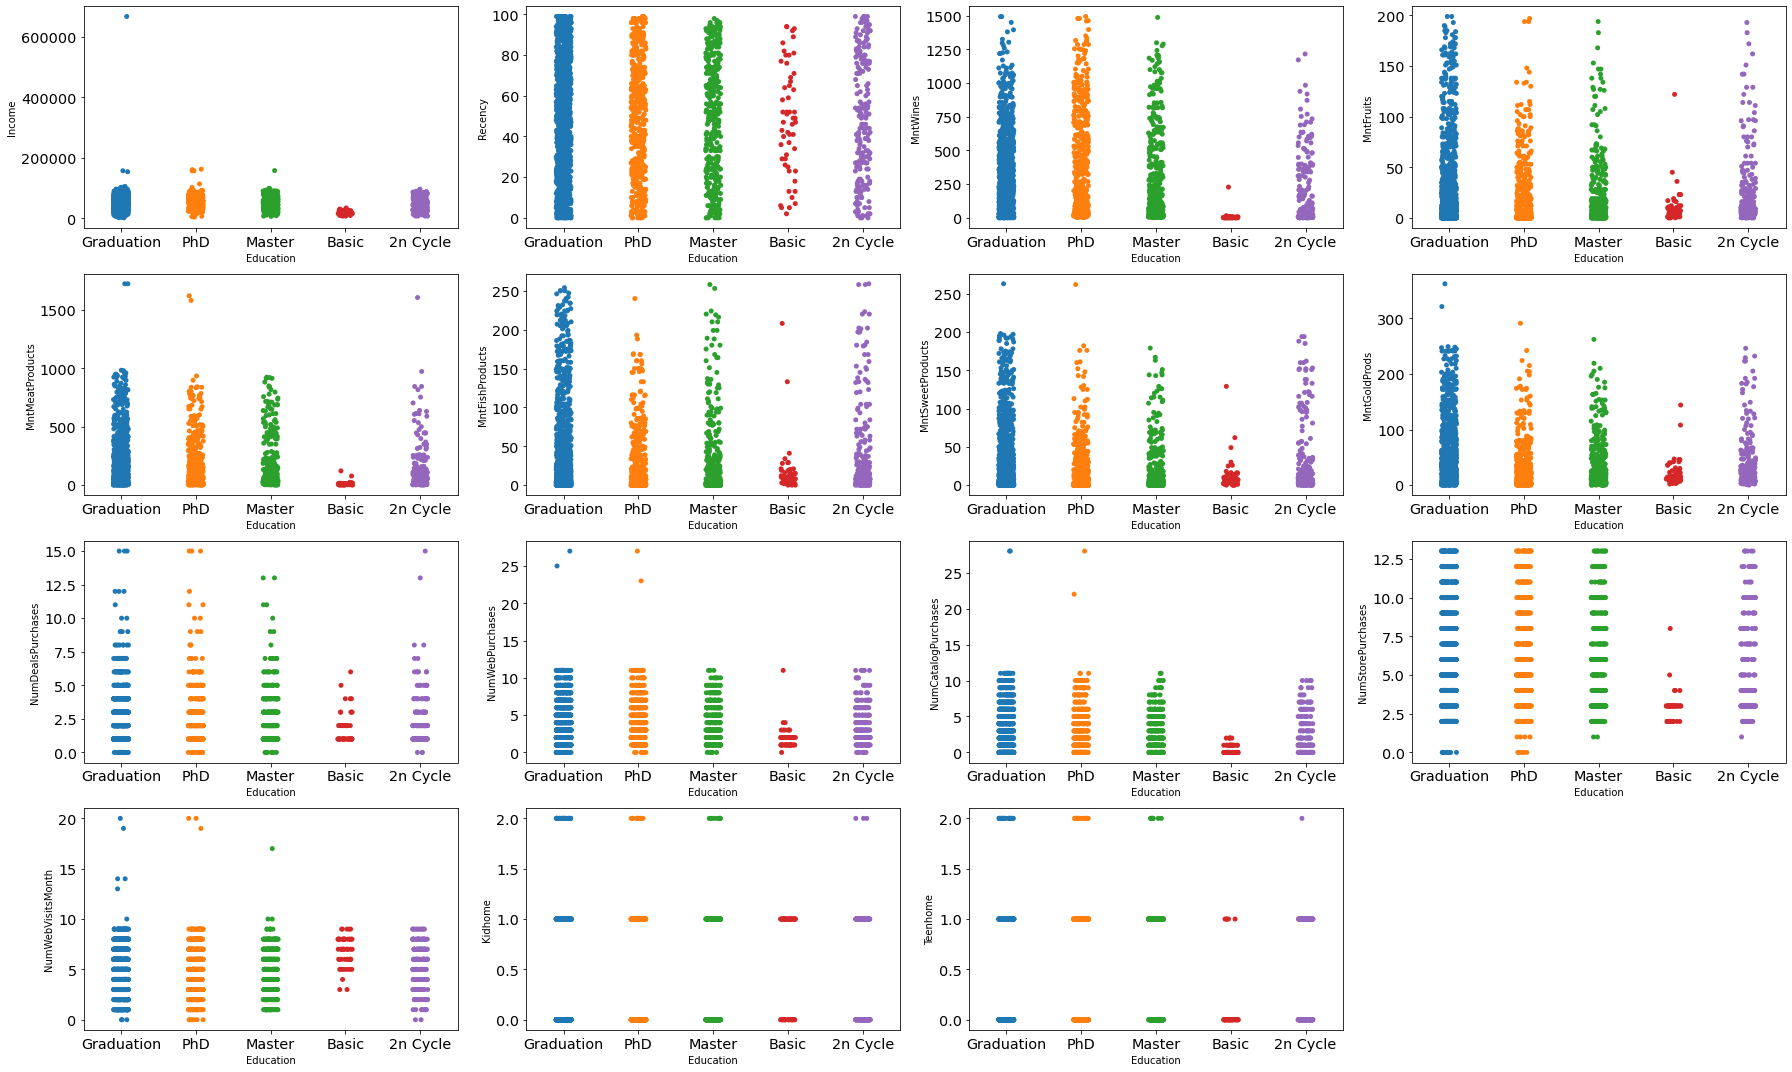

In [17]:
fig = plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
  ax = fig.add_subplot(4, 4, i+1)
  sns.stripplot(ax=ax, data=df, x='Education', y=nums[i])
  plt.tight_layout()

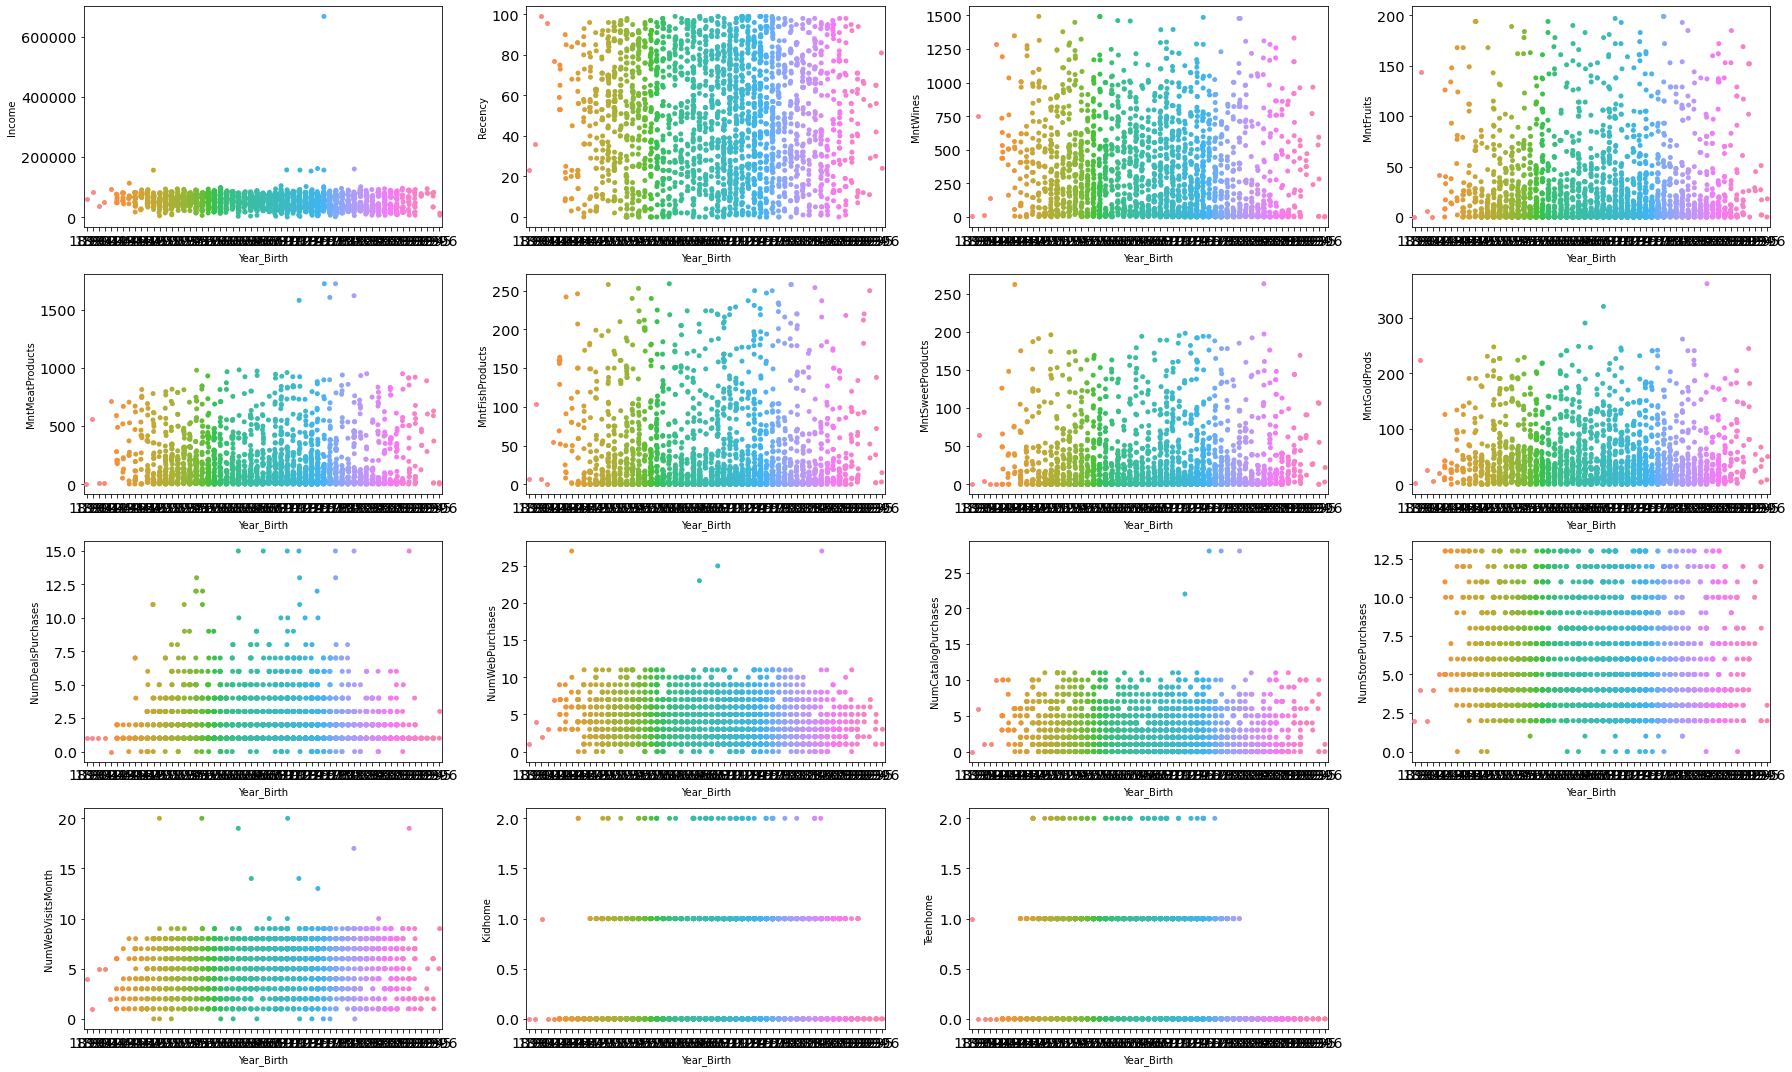

In [18]:
fig = plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
  ax = fig.add_subplot(4, 4, i+1)
  sns.stripplot(ax=ax, data=df, x='Year_Birth', y=nums[i])
  plt.tight_layout()

* Tingkat education basic paling sedikit melakukan pembelian di berbagai metode (toko,katalog,diskon,dll)
* Mayoritas pembeli paling banyak berada di tingkatan graduation
* Costumer dengan latar edukasi basic paling banyak hanya memiliki 1 anak
* Pembeli yang paling sedikit berasal dari edukasi basic, hal ini mungkin berhubungan dengan income karena basic memiliki income rendah daripada yang lain


### Marital_Status

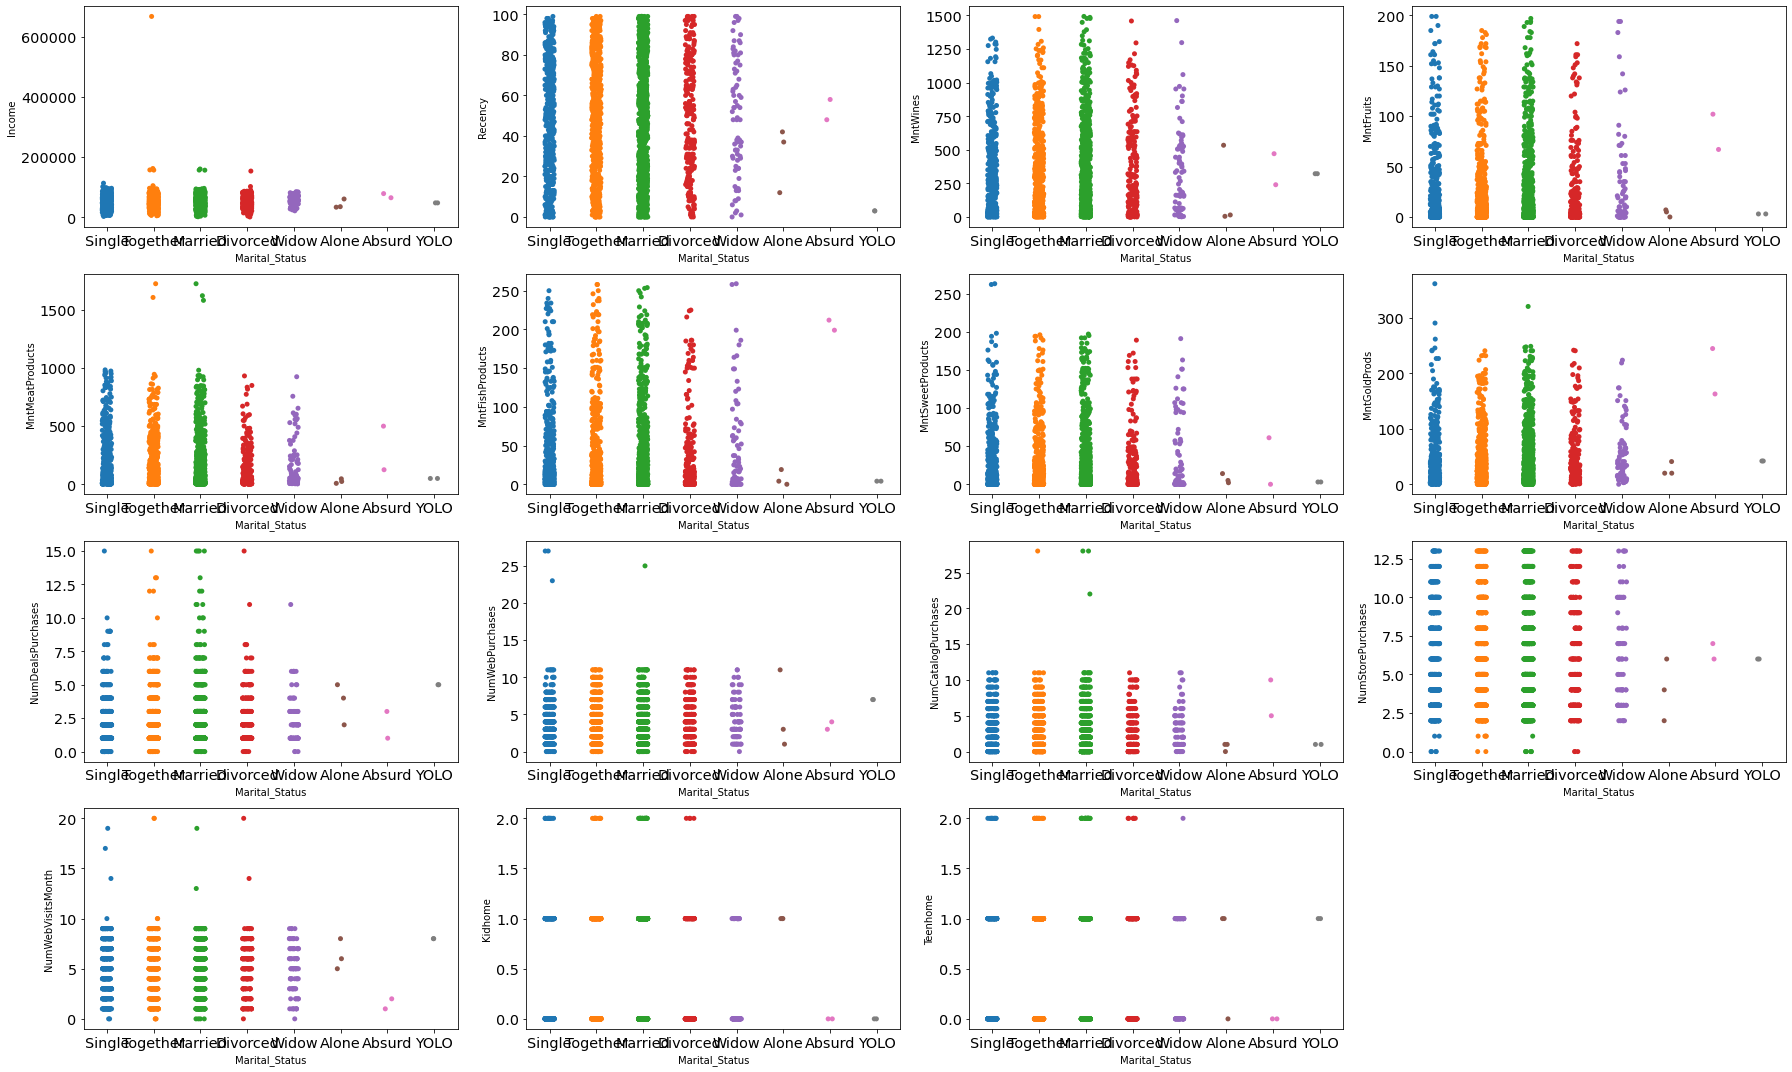

In [16]:
fig = plt.figure(figsize=(25,15))
for i in range(0, len(nums)):
  ax = fig.add_subplot(4, 4, i+1)
  sns.stripplot(ax=ax, data=df, x='Marital_Status', y=nums[i])
  plt.tight_layout() 

* Customer yang memiliki status menikah  paling banyak membeli barang dengan discount
* Customer absurd dan yolo tidak memiliki anak kecil
* Customer absurd tidak memiliki remaja
* Customer absurd, yolo, alone terlihat lebih sedikit bertransaksi dari yang lain

### AcceptedCmp1

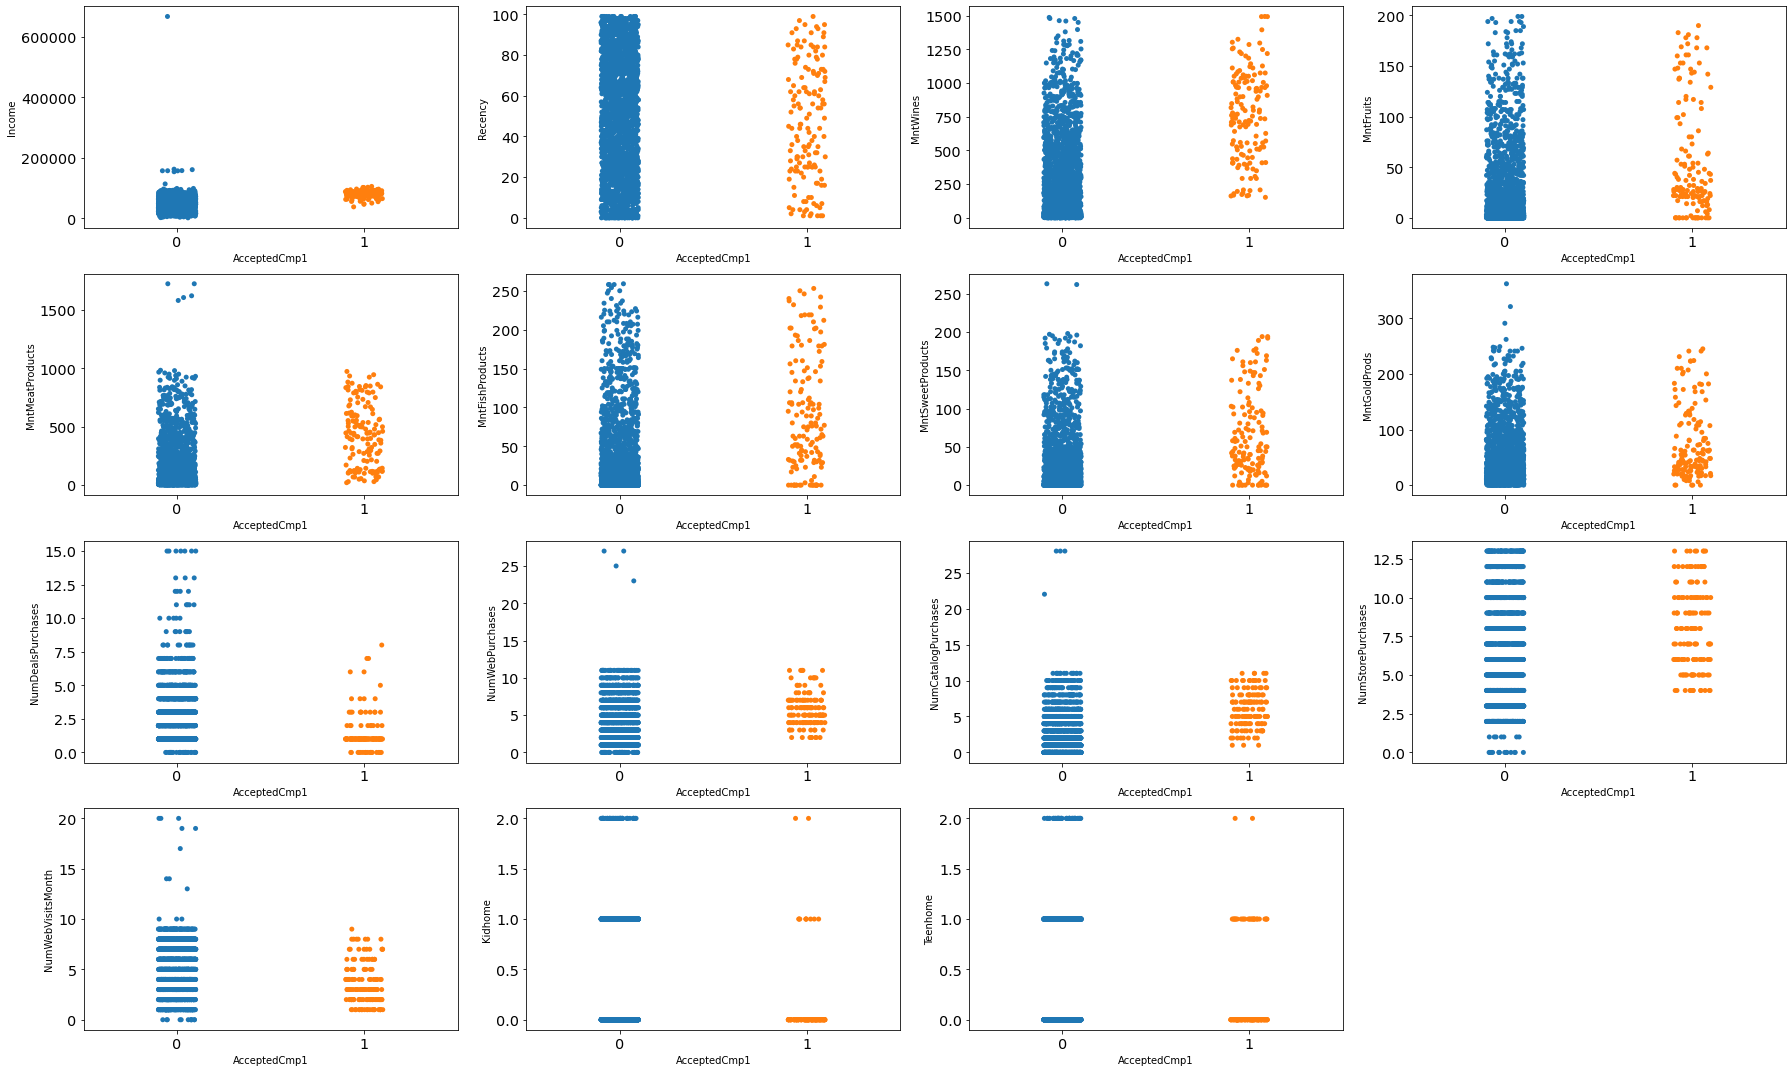

In [19]:
fig = plt.figure(figsize=(25,15))
for i in range(0, len(nums)):
  ax = fig.add_subplot(4, 4, i+1)
  sns.stripplot(ax=ax, data=df, x='AcceptedCmp1', y=nums[i])
  plt.tight_layout()

* Mayoritas item yang dibeli di toko berjumlah 2 ke atas
* Mayoritas item yang dibeli melalui diskon berjumlah kurang dari 10
* Mayoritas item yang dibeli dari katalog berjumlah kurang dari 15
* Jumlah anak kecil yang paling banyak dimiliki customer adalah 2
* Jumlah anak remaja yang paling banyak dimiliki customer adalah 2

### AcceptedCmp2

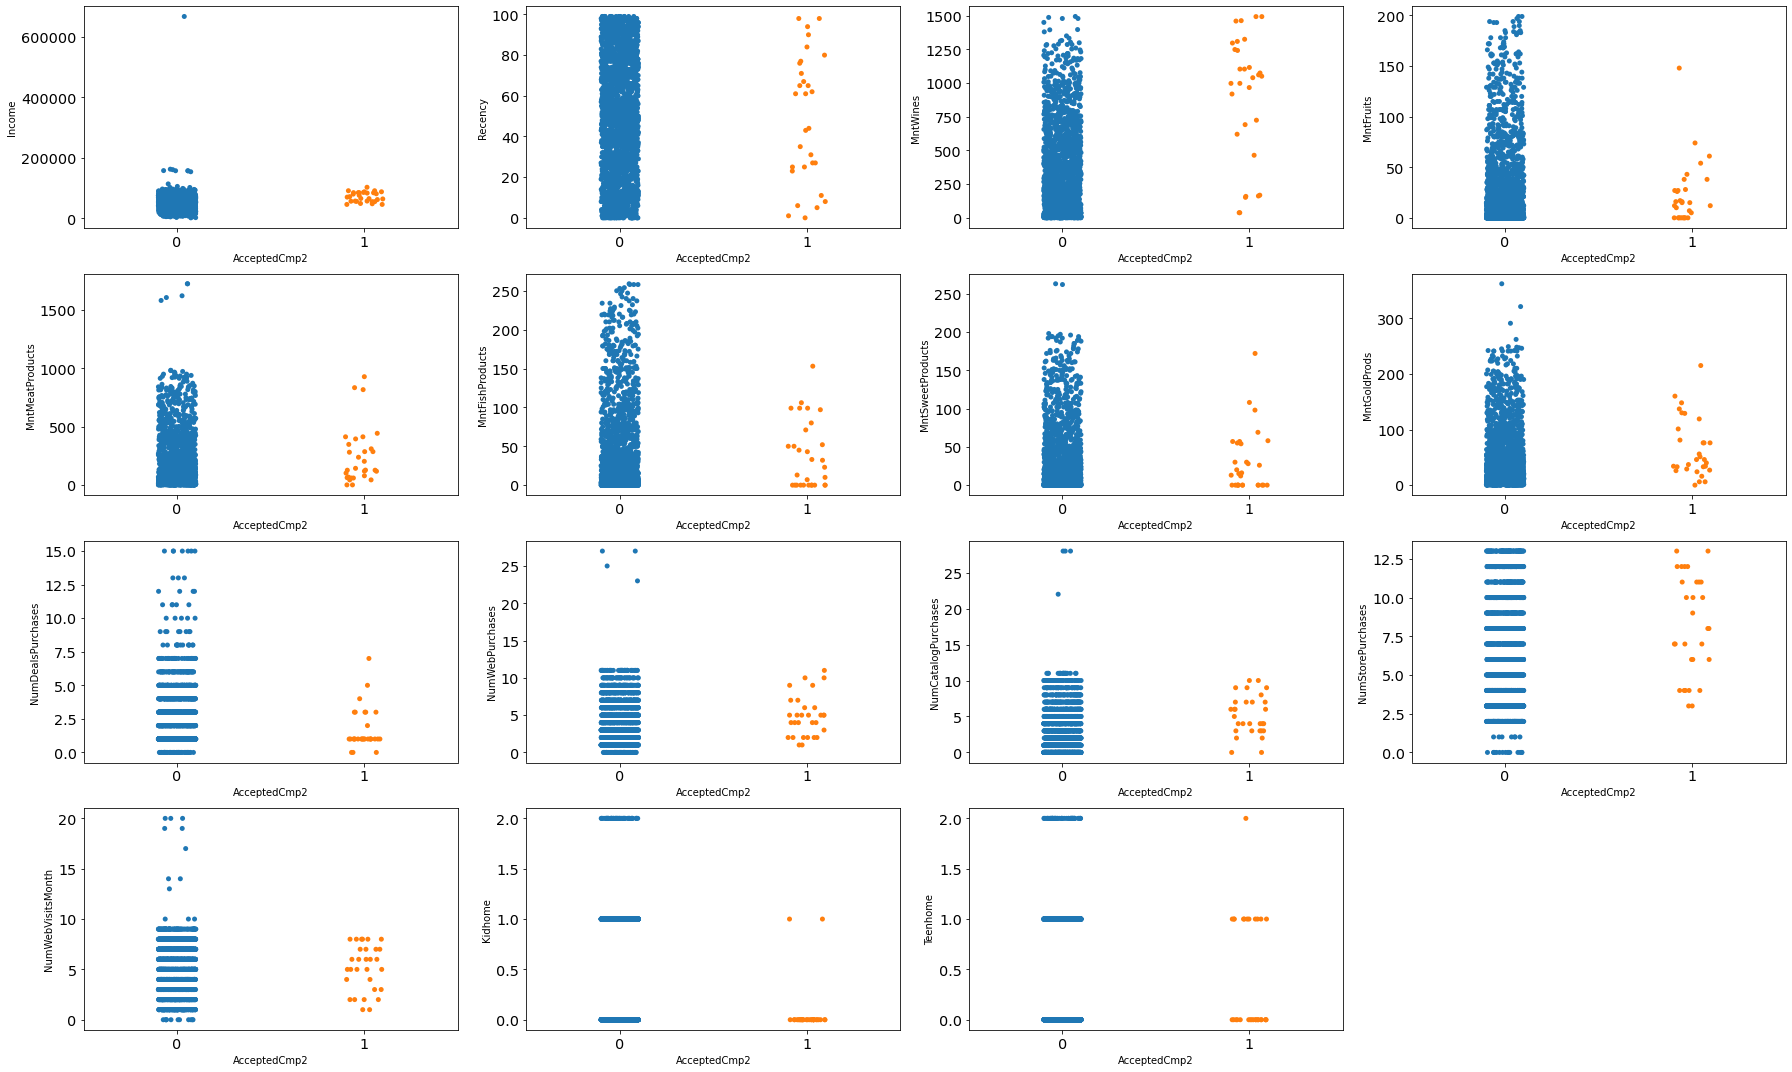

In [21]:
fig = plt.figure(figsize=(25,15))
for i in range(0, len(nums)):
  ax = fig.add_subplot(4, 4, i+1)
  sns.stripplot(ax=ax, data=df, x='AcceptedCmp2', y=nums[i])
  plt.tight_layout()

* Mayoritas item yang dibeli di toko berjumlah 2 ke atas
* Mayoritas item yang dibeli melalui diskon berjumlah kurang dari 10
* Mayoritas item yang dibeli dari katalog berjumlah kurang dari 15
* Jumlah anak kecil yang paling banyak dimiliki customer adalah 1
* Jumlah anak remaja yang paling banyak dimiliki customer adalah 2

### AcceptedCmp3

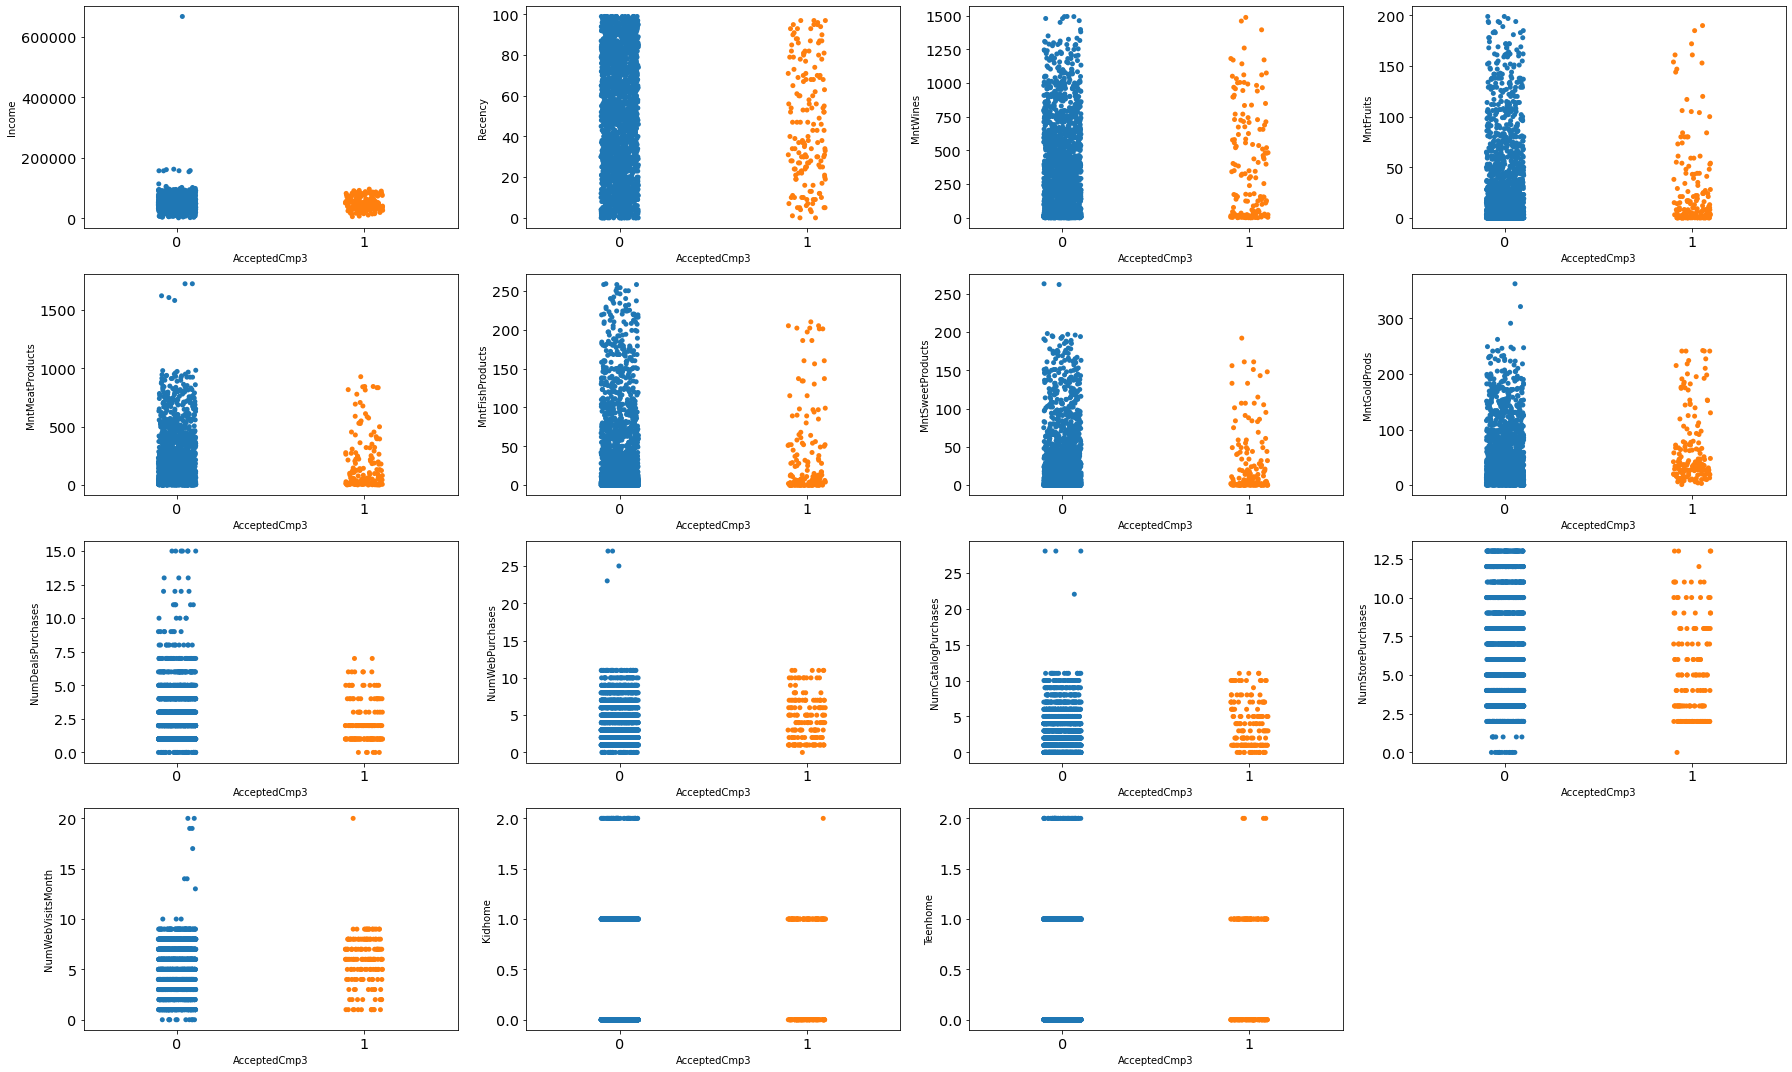

In [22]:
fig = plt.figure(figsize=(25,15))
for i in range(0, len(nums)):
  ax = fig.add_subplot(4, 4, i+1)
  sns.stripplot(ax=ax, data=df, x='AcceptedCmp3', y=nums[i])
  plt.tight_layout()

* Mayoritas item yang dibeli di toko berjumlah 2 ke atas
* Mayoritas item yang dibeli melalui diskon berjumlah kurang dari 10
* Mayoritas item yang dibeli dari katalog berjumlah kurang dari 15
* Jumlah anak kecil yang paling banyak dimiliki customer adalah 2
* Jumlah anak remaja yang paling banyak dimiliki customer adalah 2

### AcceptedCmp4

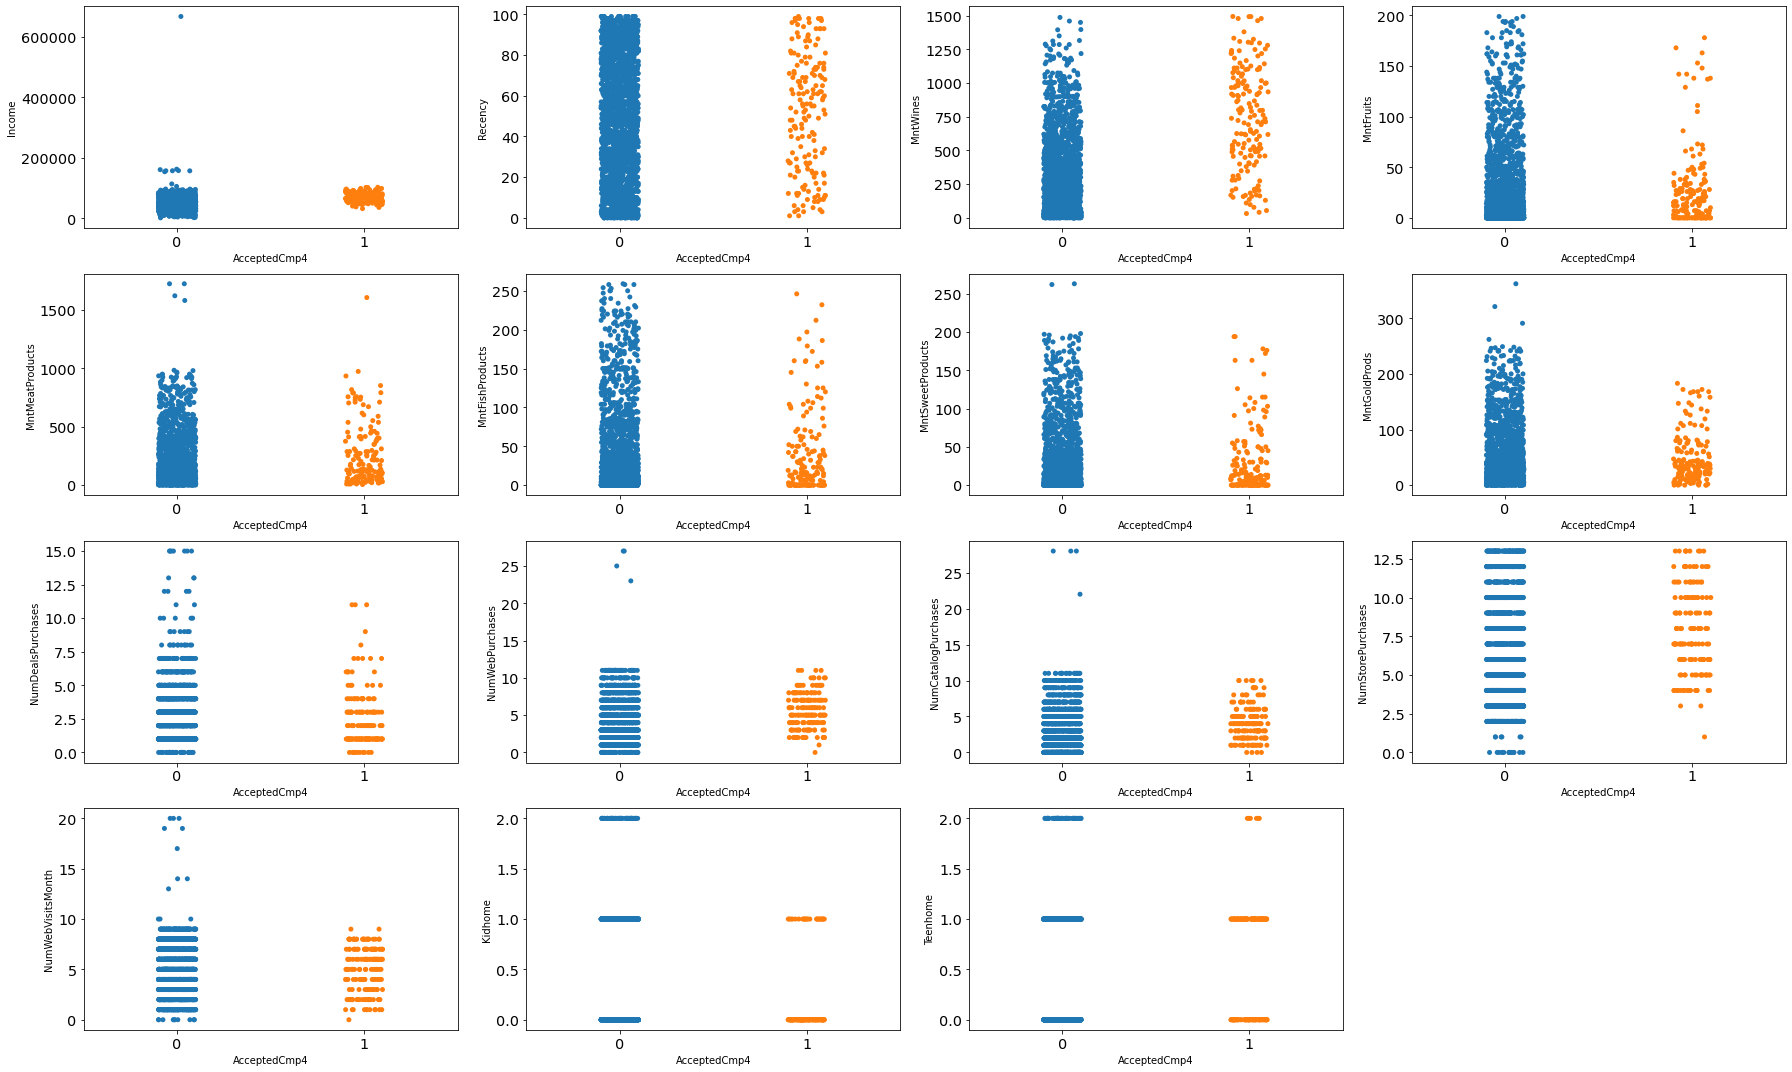

In [23]:
fig = plt.figure(figsize=(25,15))
for i in range(0, len(nums)):
  ax = fig.add_subplot(4, 4, i+1)
  sns.stripplot(ax=ax, data=df, x='AcceptedCmp4', y=nums[i])
  plt.tight_layout()

* Mayoritas item yang dibeli di toko berjumlah 2 ke atas
* Mayoritas item yang dibeli melalui diskon berjumlah kurang dari 10
* Mayoritas item yang dibeli dari katalog berjumlah kurang dari 15
* Jumlah anak kecil yang paling banyak dimiliki customer adalah 1
* Jumlah anak remaja yang paling banyak dimiliki customer adalah 2

### AcceptedCmp5

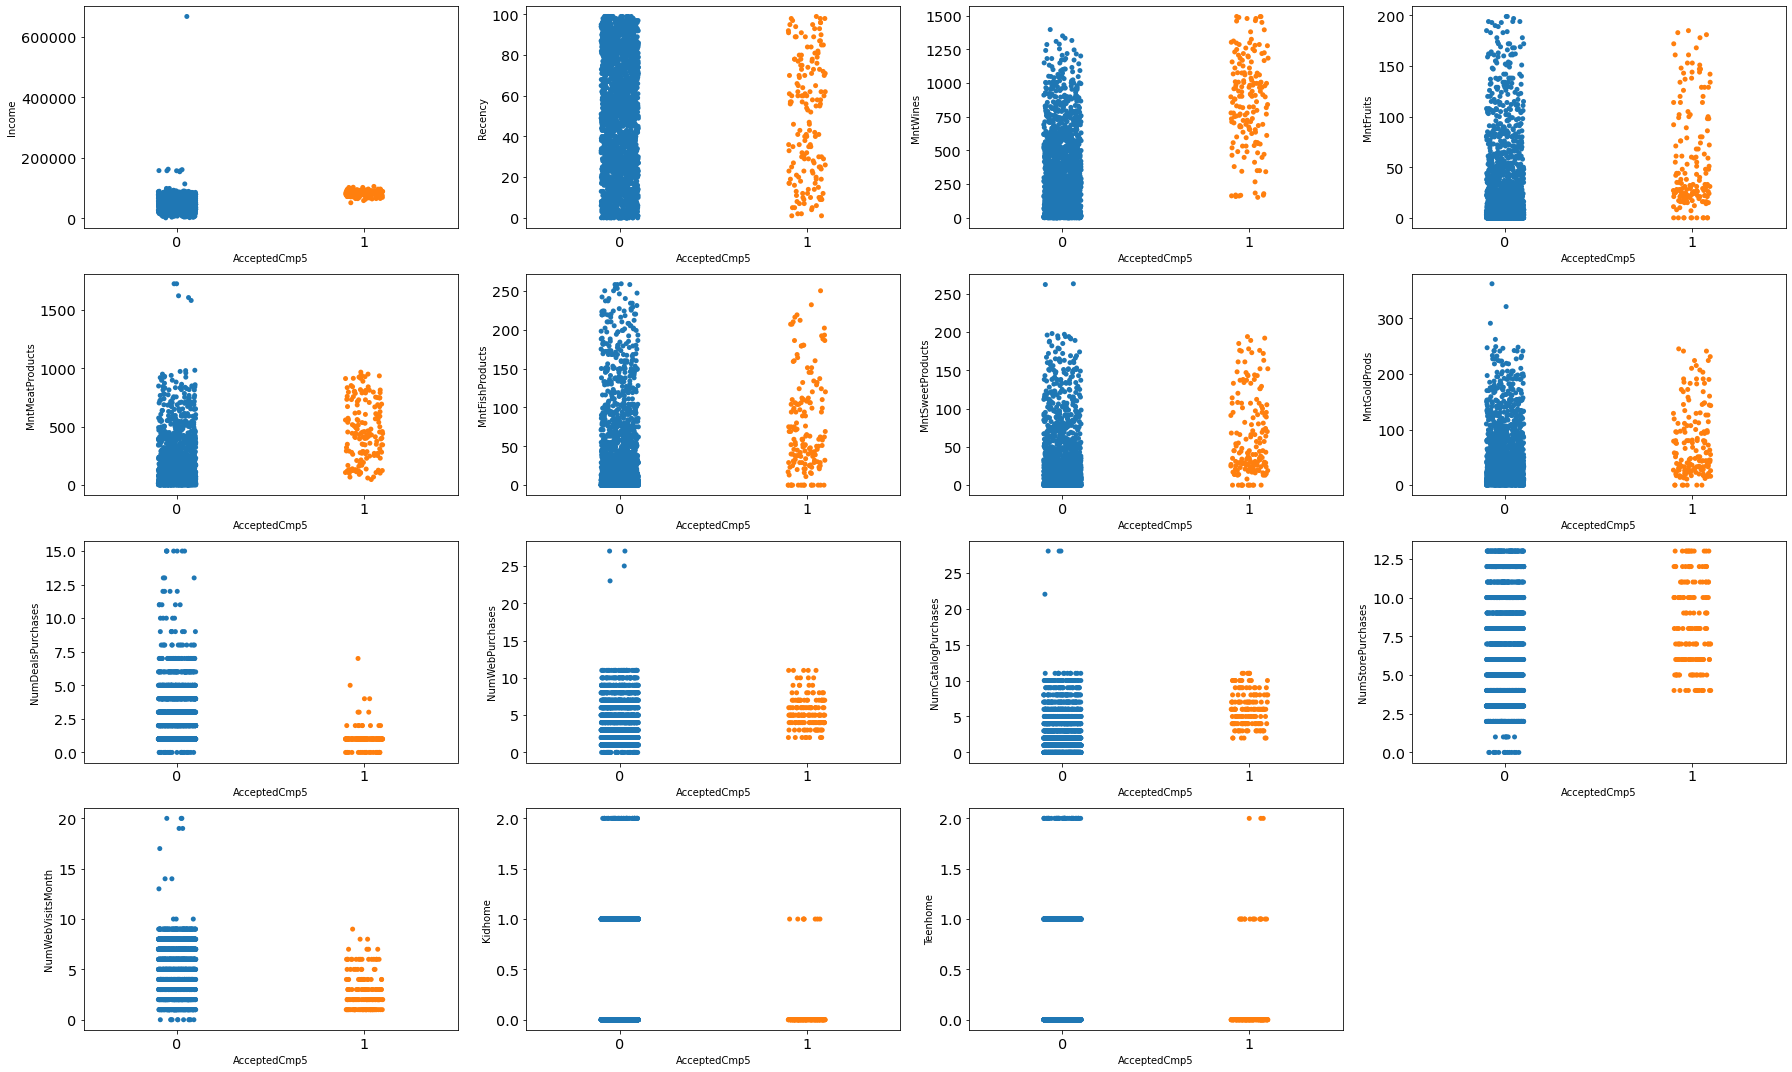

In [24]:
fig = plt.figure(figsize=(25,15))
for i in range(0, len(nums)):
  ax = fig.add_subplot(4, 4, i+1)
  sns.stripplot(ax=ax, data=df, x='AcceptedCmp5', y=nums[i])
  plt.tight_layout()

* Mayoritas item yang dibeli di toko berjumlah 2 ke atas
* Mayoritas item yang dibeli melalui diskon berjumlah kurang dari 10
* Mayoritas item yang dibeli dari katalog berjumlah kurang dari 15
* Jumlah anak kecil yang paling banyak dimiliki customer adalah 1
* Jumlah anak remaja yang paling banyak dimiliki customer adalah 2

### Complain

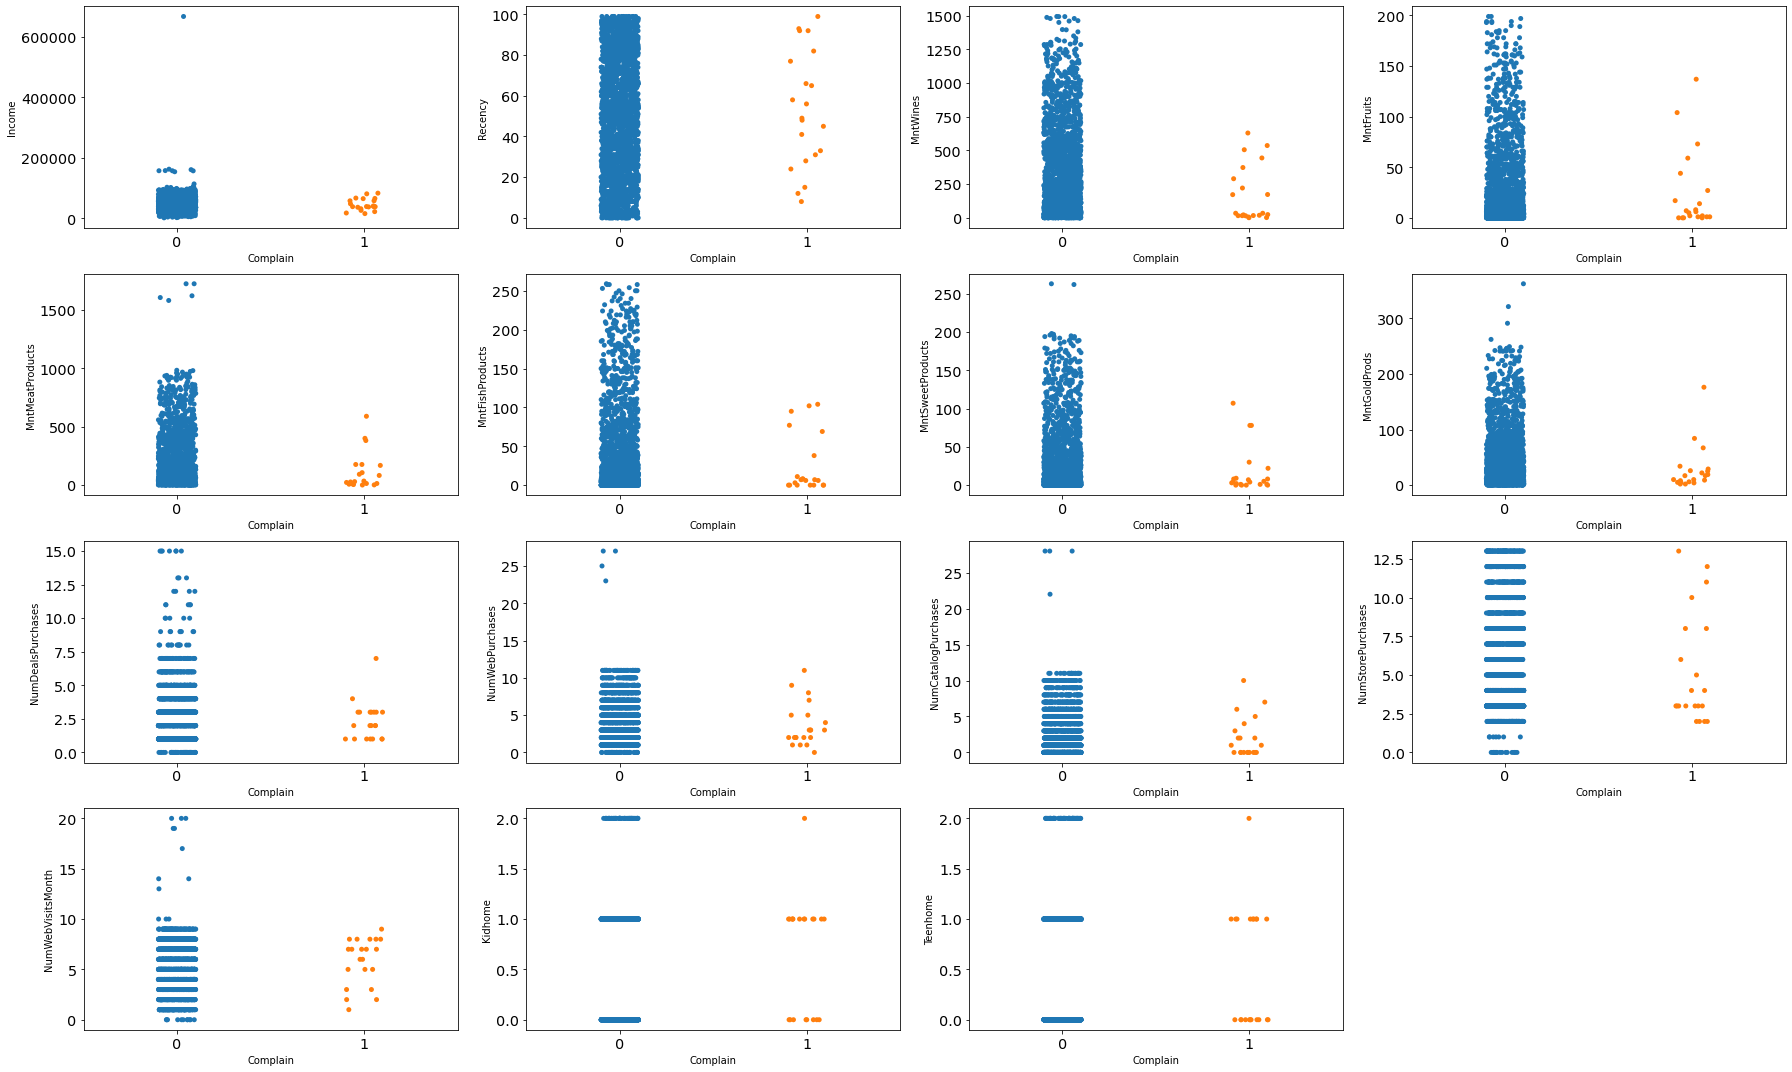

In [20]:
fig = plt.figure(figsize=(25,15))
for i in range(0, len(nums)):
  ax = fig.add_subplot(4, 4, i+1)
  sns.stripplot(ax=ax, data=df, x='Complain', y=nums[i])
  plt.tight_layout()

* Banyak item yang dibeli di toko berjumlah 2 ke atas
* Banyak item yang dibeli melalui diskon berjumlah kurang dari 10
* Banyak item yang dibeli dari katalog berjumlah kurang dari 15

### Response

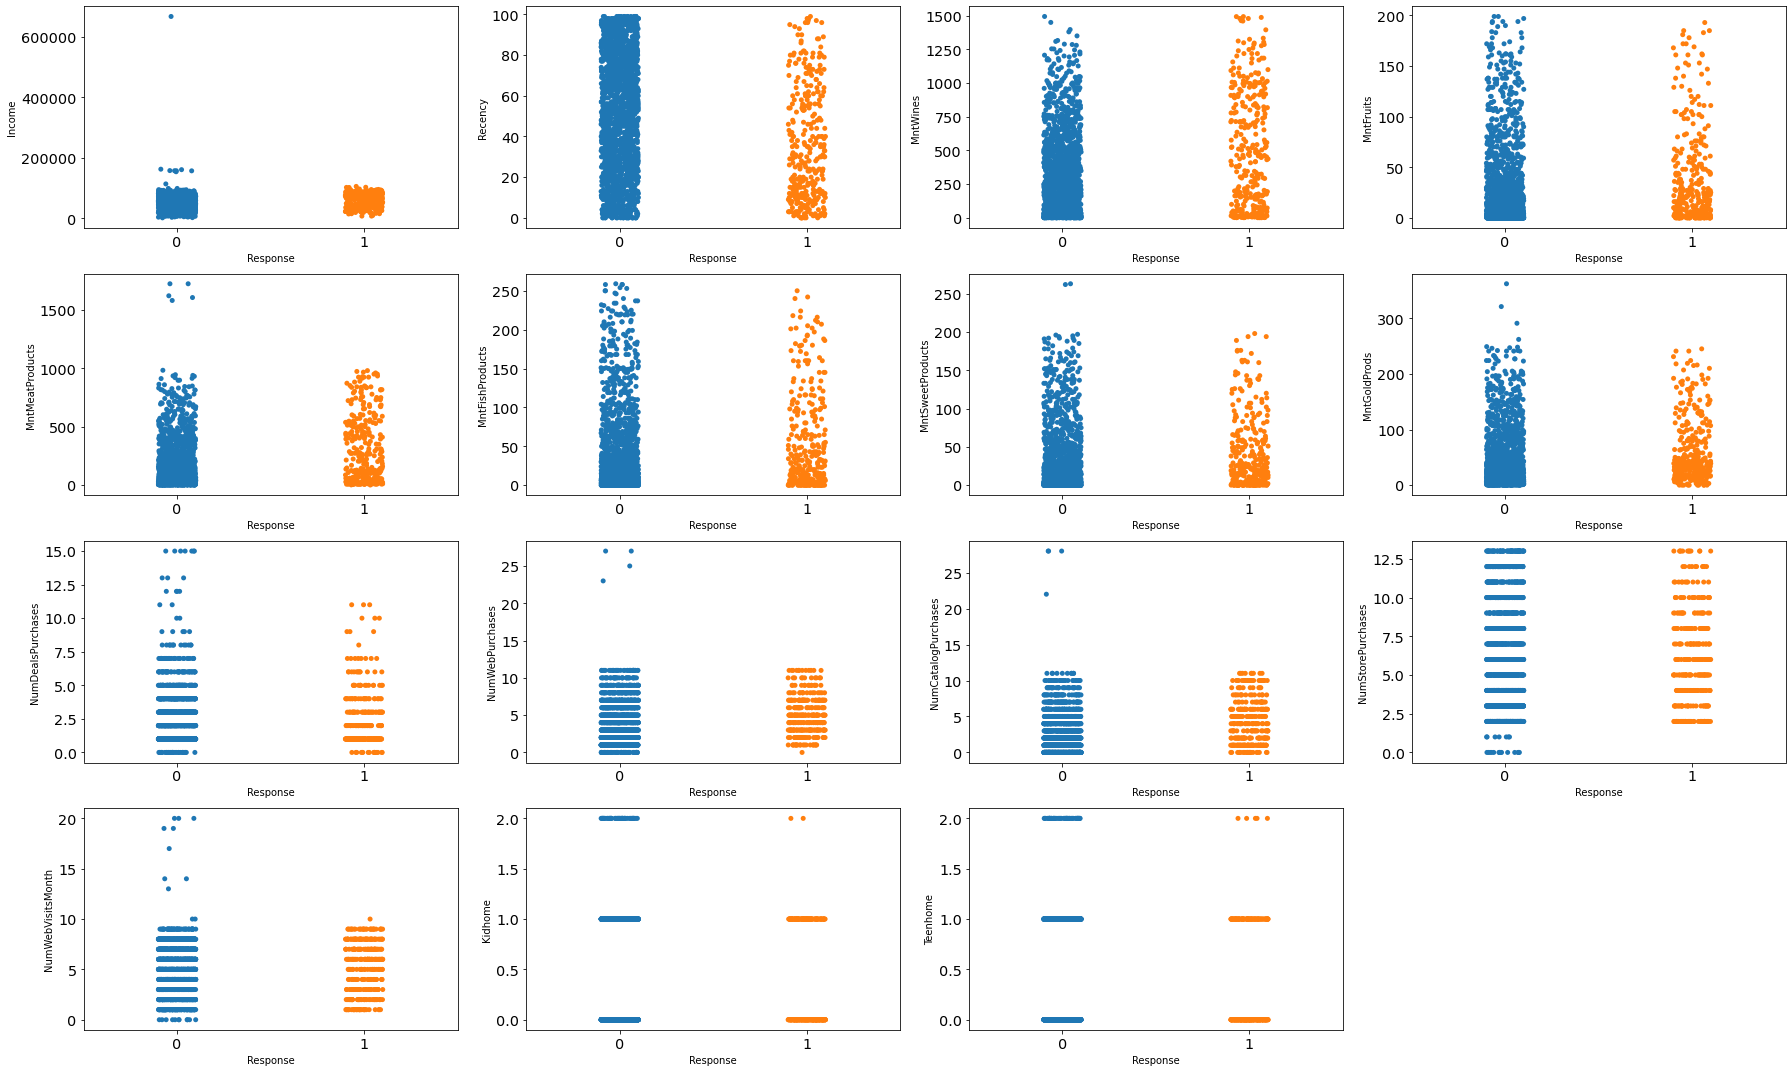

In [25]:
fig = plt.figure(figsize=(25,15))
for i in range(0, len(nums)):
  ax = fig.add_subplot(4, 4, i+1)
  sns.stripplot(ax=ax, data=df, x='Response', y=nums[i])
  plt.tight_layout()

* Banyak item yang dibeli di toko berjumlah 2 ke atas
* Banyak item yang dibeli melalui diskon berjumlah kurang dari 10
* Banyak item yang dibeli dari katalog berjumlah kurang dari 15

## 4. Business insight:

- Kimberly Bianca

### Income vs. Campaign

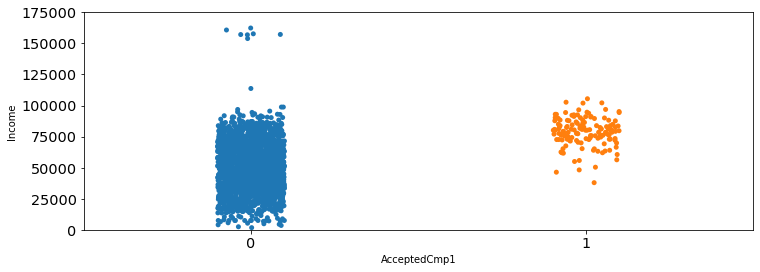

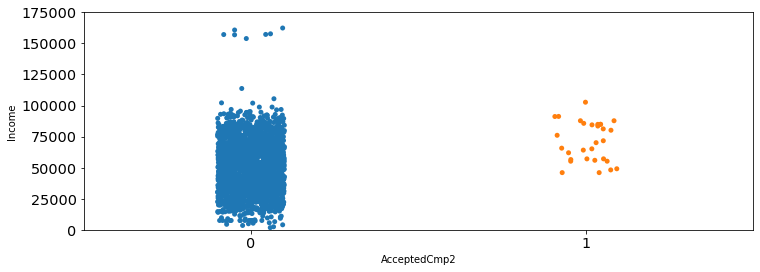

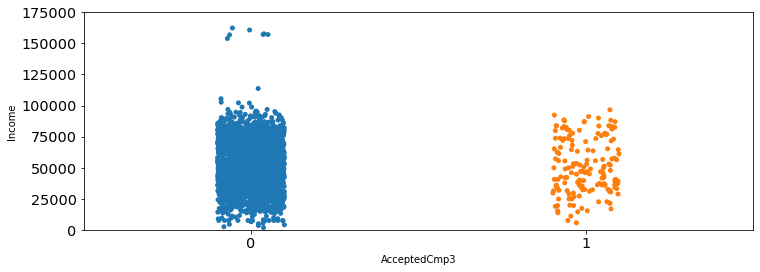

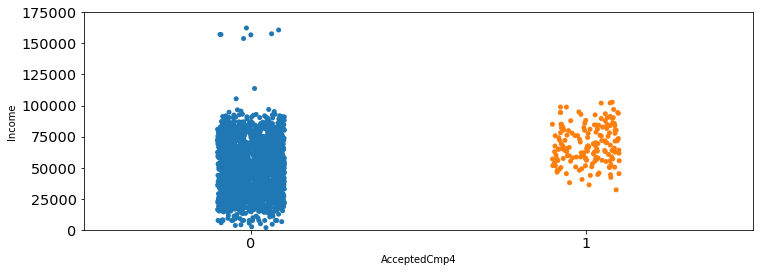

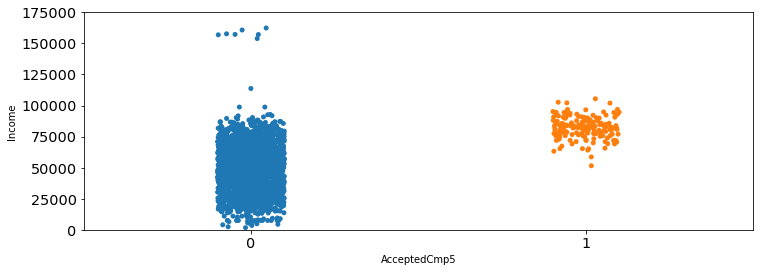

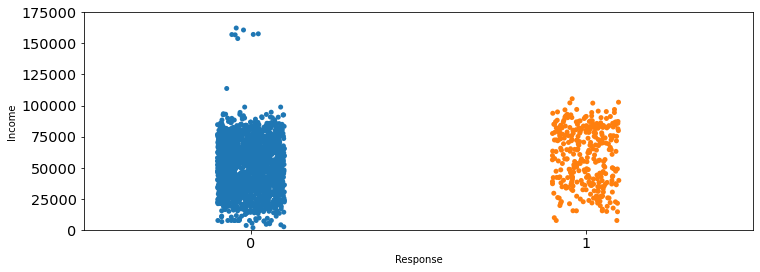

In [27]:


Accepted_Campaign = ['AcceptedCmp1' ,'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

for i in Accepted_Campaign:
  sns.stripplot(data=df, x=i, y='Income')
  plt.ylim(0, 175000)
  plt.show()

Customer dengan income diatas 120000 tidak ada yang menerima campaign perusahaan. Jadi sebaiknya perusahaan fokus melakukan campaign kepada customer dengan income dibawah 120000.

### Birth year vs. Response

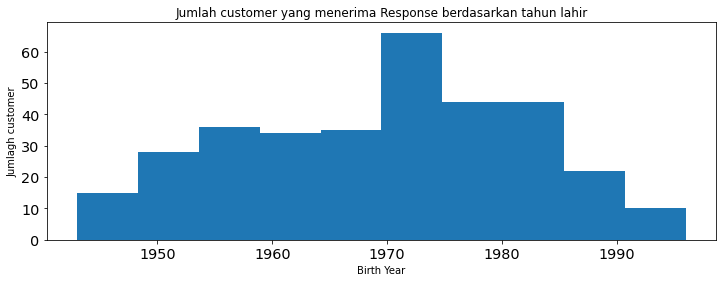

In [28]:
df_resp_yes = df[df['Response'] == 1]
plt.hist(data=df_resp_yes, x='Year_Birth')
plt.xlabel('Birth Year')
plt.ylabel('Jumlagh customer')
plt.title('Jumlah customer yang menerima Response berdasarkan tahun lahir')
plt.show()

Kategori customer yang menerima Response (marketing campaign terakhir) terbanyak berasal dari tahun lahir 1970-1975. Jika perusahaan harus memprioritaskan beberapa customer saja, maka perusahaan dapat memilih customer yang lahir pada tahun 1970-1985 untuk menawarkan sebuah campaign.

### Recency vs. Response

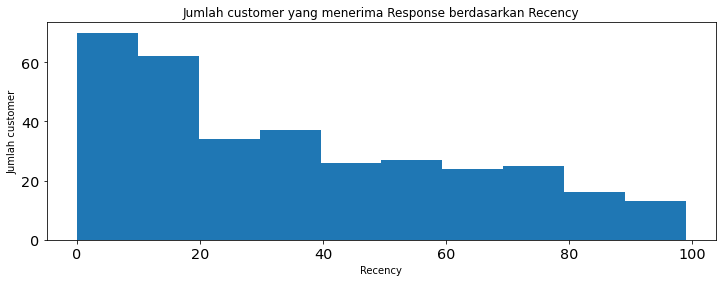

In [29]:
df_resp_yes = df[df['Response'] == 1]
plt.hist(data=df_resp_yes, x='Recency')
plt.xlabel('Recency')
plt.ylabel('Jumlah customer')
plt.title('Jumlah customer yang menerima Response berdasarkan Recency')
plt.show()

Berdasarkan recency (kapan terakhir kali customer melakukan pembayaran), semakin rendah recency maka semakin besar kemungkinan customer tersebut menerima marketing campaign perusahaan yang terakhir (Response). Sehingga marketing campaign selanjutnya dapat difokuskan kepada customer dengan recency yang rendah.

# Purchase type vs. Response

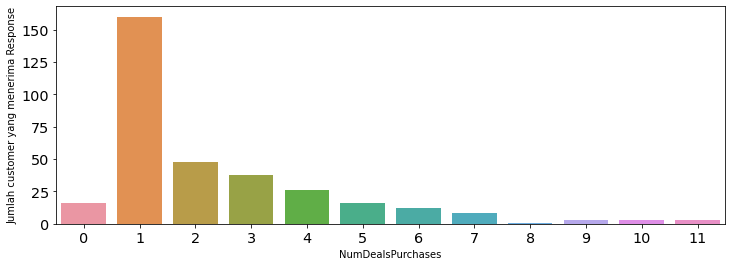

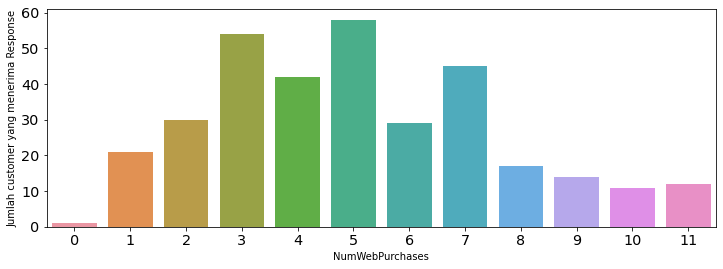

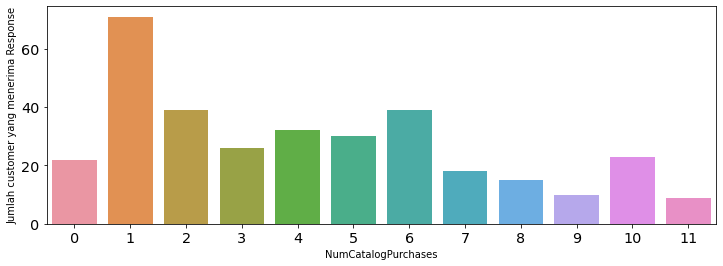

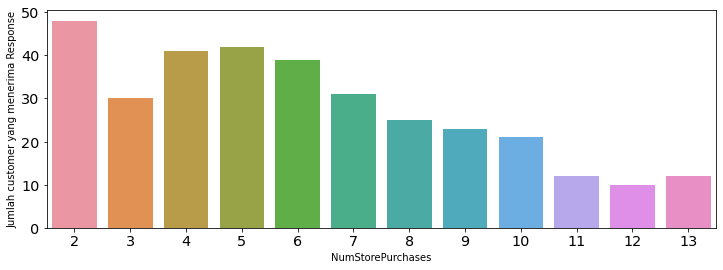

In [30]:
purchase_type = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df_resp_yes = df[df['Response'] == 1]
for i in purchase_type:
  sns.countplot(data=df_resp_yes, x=i)
  plt.xlabel(i)
  plt.ylabel('Jumlah customer yang menerima Response')
  plt.show()

Semakin sedikit pembelian yang dilakukan (baik yang menggunakan diskon ataupun yang melalui web, catalog, store), maka semakin besar kemungkinan customer untuk menerima Response (marketing campaign terakhir). Sehingga perusahaan dapat menargetkan campaign kepada customer dengan jumlah pembelian yang masih sedikit.

### Kid and teen vs. Response

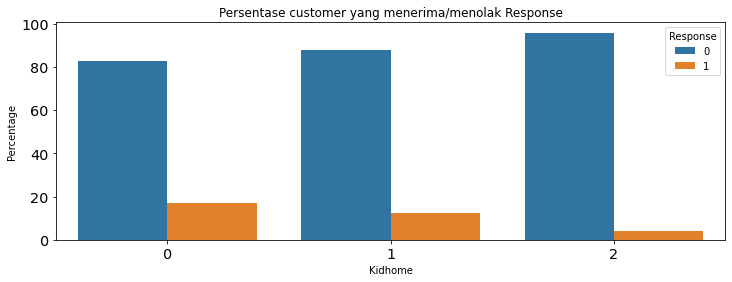

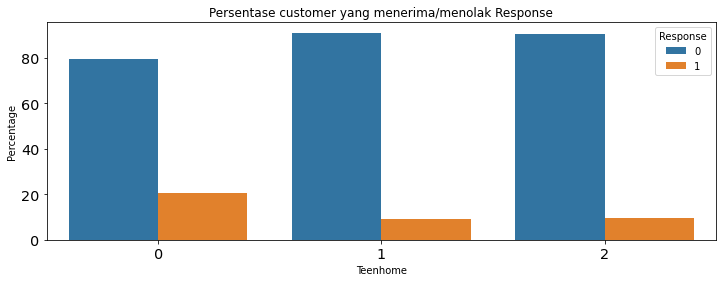

In [31]:
kid_teen = ['Kidhome', 'Teenhome']

for i in kid_teen:
  df_temp = df.groupby([i, 'Response'])['ID'].count().reset_index()
  df_temp_2 = df.groupby([i])['ID'].count().reset_index()
  df_merge = df_temp.merge(df_temp_2, on=i, how='inner')
  df_merge.columns = [i, 'Response', 'CountCust', 'TotalCust']
  df_merge['Percentage'] = df_merge['CountCust'] / df_merge['TotalCust'] * 100
  
  sns.barplot(x = i, y = 'Percentage', data = df_merge, hue = 'Response')
  plt.title('Persentase customer yang menerima/menolak Response')
  plt.show()

Semakin tinggi jumlah anak/remaja yang dimiliki customer, maka semakin kecil kemungkinan customer menerima Response (marketing campaign terakhir), sehingga lebih baik perusahaan menargetkan campaign kepada customer yang tidak memiliki anak/remaja.

## 5. Git:

- Nur Syamsu Wais Al Qorni

1. Membuat Organization untuk final project yang bernama Final-Project-Nol-Bir-Rakamin-DS28
2. masukan anggota kedalam Organization
3. membuat Repositories bernama Marketing-Campaign 
4. memamasukan anggota  kedalam Repositories untuk dapat mengerjakan task masing masing, dan mengubah role ke admin
5. memasukan file ipynb dan README.md menggunakan push
6. membuat branch untuk masing masing anggota
![image.png](img/github-concept.png)
